In [4]:
from enum import Enum
from math import sin, cos
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 

In [26]:
class Function:

    def __init__(self):

        self.left = -1.8
        self.right = 0.2

    def __call__(self, x):
        return x ** 2 - 10 * (sin(x) ** 15)
    
    def derivative(self, x):
        return 2 * x - 150 * cos(x) * (sin(x) ** 14)

In [27]:
f = Function()

In [28]:
print(f(0))

0.0


In [29]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = list(map(func, func_x))

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Wykres zadanej funkcji f

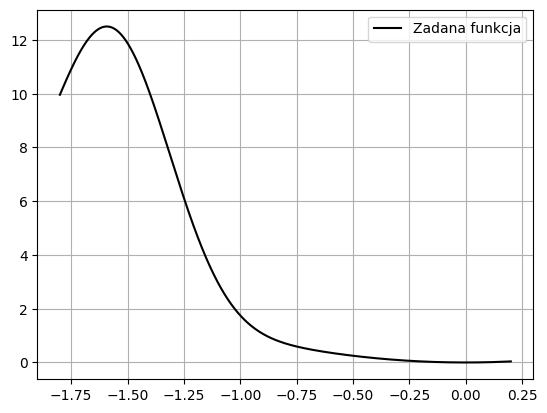

In [142]:
plot_function(f, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Wykres pochodnej zadanej funkcji f

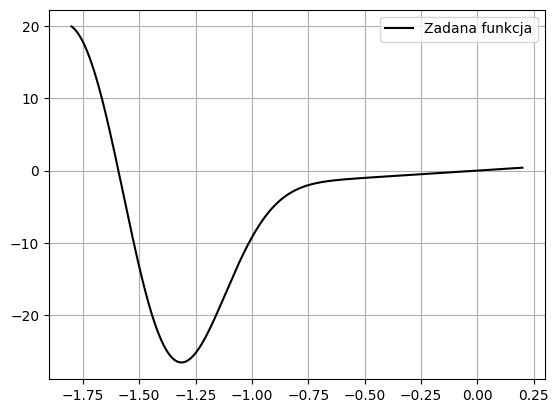

In [11]:
plot_function(f.derivative, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Znajdowanie miejsc zerowych funkcji nieliniowych metodą siecznych

![title](img_vsc/img01.png)

In [12]:
# Kryteria przyrostowe
# Stopping conditions for secant_method
class ConditionSecant(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda x_1, x_2, eps: abs(x_1 - x_2) < eps

In [13]:
def secant_method(f, x_0, x_1, condition, eps, max_iterations):
    
    x_i = x_0
    x_j = x_1 # x_j = x_(i + 1)
    
    for iteration in range(max_iterations):
        
        if f(x_i) == f(x_j): # Division by zero, thus no solution
            return float("inf"), -1
        
        x_i, x_j = x_j, x_j - ( (x_j - x_i) / (f(x_j) - f(x_i)) ) * f(x_j)
        
        if condition == ConditionSecant.ABS and ConditionSecant.ABS(f(x_j), eps):
            return x_j, iteration + 1
        elif condition == ConditionSecant.DISTANCE and ConditionSecant.DISTANCE(x_i, x_j, eps):
            return x_j, iteration + 1
    
    print("Exceeded max number of iterations")
    return float("inf"), -1 # Exceeded number of iterations

Przykładowe użycie

In [16]:
print(secant_method(f = f, x_0 = -1.7, x_1 = -1.8, condition = ConditionSecant.ABS, eps = 1e-2, max_iterations = 1000))

(-0.07267217795961838, 14)


Znajdowanie miejsc zerowych funkcji nieliniowych metodą Newtona-Raphsona

![title](img_vsc/img02.png)

In [18]:
# Stopping conditions for newton_raphson_method
class ConditionNewton(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda y_i, yd_i, eps: abs(y_i / yd_i) < eps

In [42]:
def newton_raphson_method(f, x_0, condition, eps, max_iterations):
    
    x_i = x_0
    
    for iteration in range(max_iterations):
        
        print(x_i)
        
        y_i = f(x_i)
        yd_i = f.derivative(x_i)
        
        if yd_i == 0: # Derivative equal to zero
            return float("inf"), -1
        
        if condition == ConditionNewton.ABS and ConditionNewton.ABS(f(y_i), eps):
            return x_i, iteration + 1
        elif condition == ConditionNewton.DISTANCE and ConditionNewton.DISTANCE(y_i, yd_i, eps):
            return x_i, iteration + 1
        
        x_i  -= y_i / yd_i        
        
    return float("inf"), -1 # Max iterations exceeded

Przykładowe użycie

In [48]:
print(newton_raphson_method(f = f, x_0 = -1.7, condition = ConditionNewton.DISTANCE, eps = 1e-5, max_iterations = 1000))

-1.7
-2.5491980170337167
-1.2653167062353272
-1.0125319694485977
-0.8244649194195268
-0.5651318652687338
-0.28678776713653537
-0.1433945354160929
-0.07169726775563984
-0.03584863387782296
-0.01792431693891148
-0.00896215846945574
-0.00448107923472787
-0.002240539617363935
-0.0011202698086819674
-0.0005601349043409837
-0.00028006745217049186
-0.00014003372608524593
-7.001686304262296e-05
-3.500843152131148e-05
-1.750421576065574e-05
(-1.750421576065574e-05, 21)


Miejsce zerowe wyznaczone przez wolfram alpha: x_0 = 0.0

In [113]:
class TestNewtonMethod():

    def __init__(self, f, max_iterations = 1000):

        self.f = f
        self.max_iterations = max_iterations

        self.eps_values_1 = [10 ** i for i in range(-1, -10 - 1, -1)]
        self.eps_values_2 = [10 ** i for i in range(-11, -20 - 1, -1)]
        self.x_values = [round(f.left + 0.1 * i, 1) for i in range(0, int(abs(f.left - f.right) / 0.1) + 1)]
                        
    def plot_heatmap_values(self, eps_values, condition):
        
        mini = float("inf")
        mini_data = (-1, -1, -1)

        data = np.zeros((len(eps_values), len(self.x_values)))

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                
                x_0, _ = newton_raphson_method(self.f, x, condition, eps, self.max_iterations)
                #print('{:.1e}'.format(x_0), x, '{:.2e}'.format(eps))
        
                if abs(x_0) < abs(mini):
                    mini = x_0
                    mini_data = (x, eps, condition)

                data[j][i] = x_0

        plt.figure(figsize=(20, 8))

        print("Min value: ", '{:.1e}'.format(mini), ", Starting x: ", mini_data[0], ", Eps: ", eps, ", Contidion: ", condition)
            
        
        hm = sn.heatmap(data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='.1e', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()

    def plot_heatmap_iterations(self, eps_values, condition):
        
        iterations_data = np.zeros((len(eps_values), len(self.x_values)), dtype=int)

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                _, iterations = newton_raphson_method(self.f, x, condition, eps, self.max_iterations)
                iterations_data[j][i] = iterations

        plt.figure(figsize=(20, 8))

        hm = sn.heatmap(iterations_data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='d', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()



In [114]:
test_newton = TestNewtonMethod(f)

ABS condition

Min value:  -1.8e-03 , Starting x:  -1.8 , Eps:  1e-10 , Contidion:  <function ConditionNewton.<lambda> at 0x000001F4CD78B1A0>


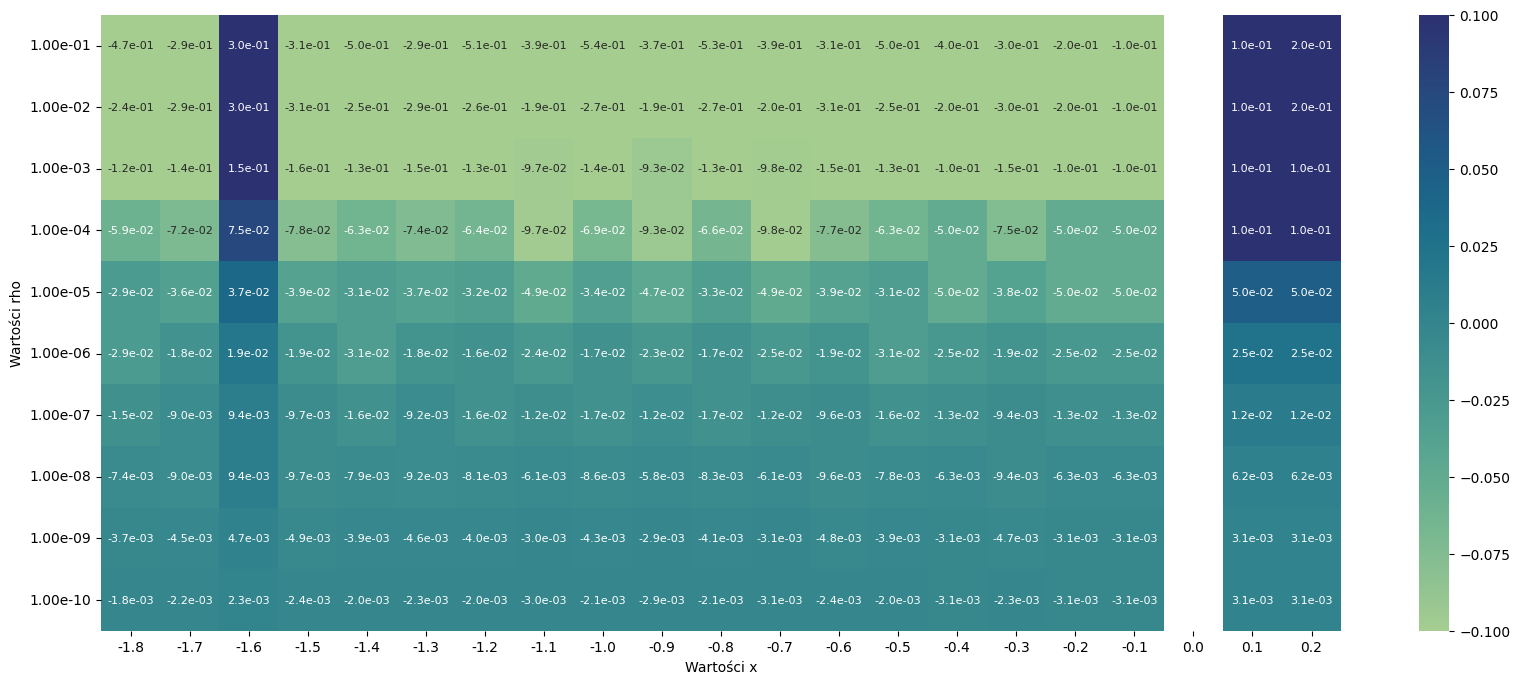

In [115]:
test_newton.plot_heatmap_values(test_newton.eps_values_1, ConditionNewton.ABS)

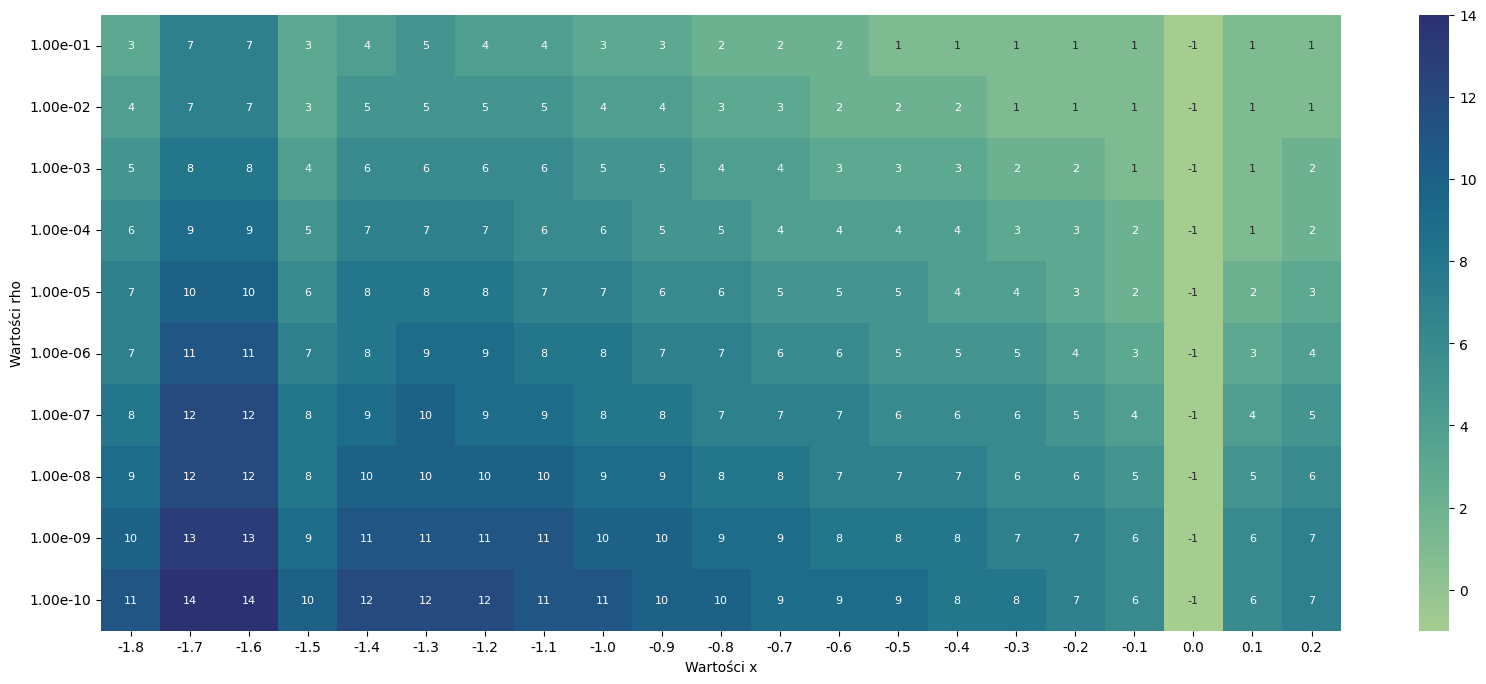

In [116]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_1, ConditionNewton.ABS)

Min value:  -5.7e-06 , Starting x:  -0.9 , Eps:  1e-20 , Contidion:  <function ConditionNewton.<lambda> at 0x000001F4CD78B1A0>


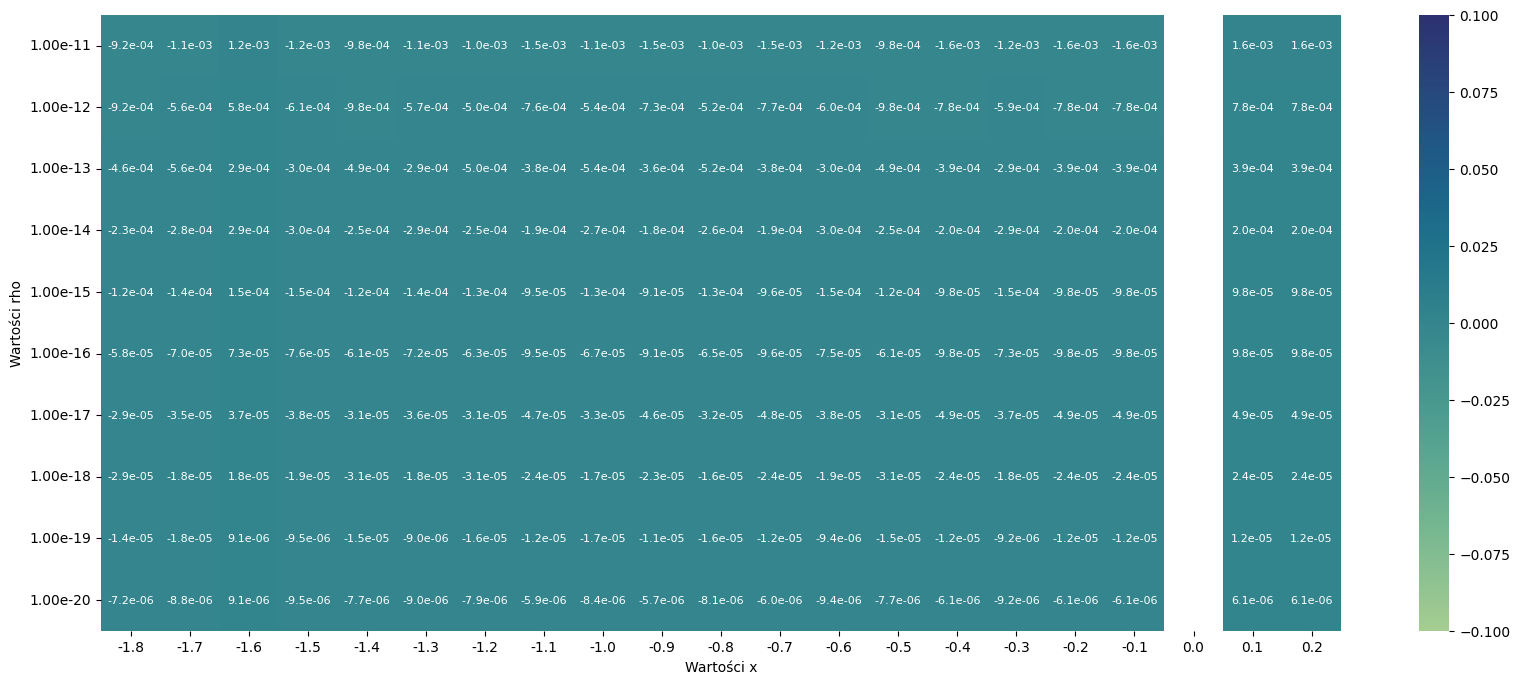

In [117]:
test_newton.plot_heatmap_values(test_newton.eps_values_2, ConditionNewton.ABS)

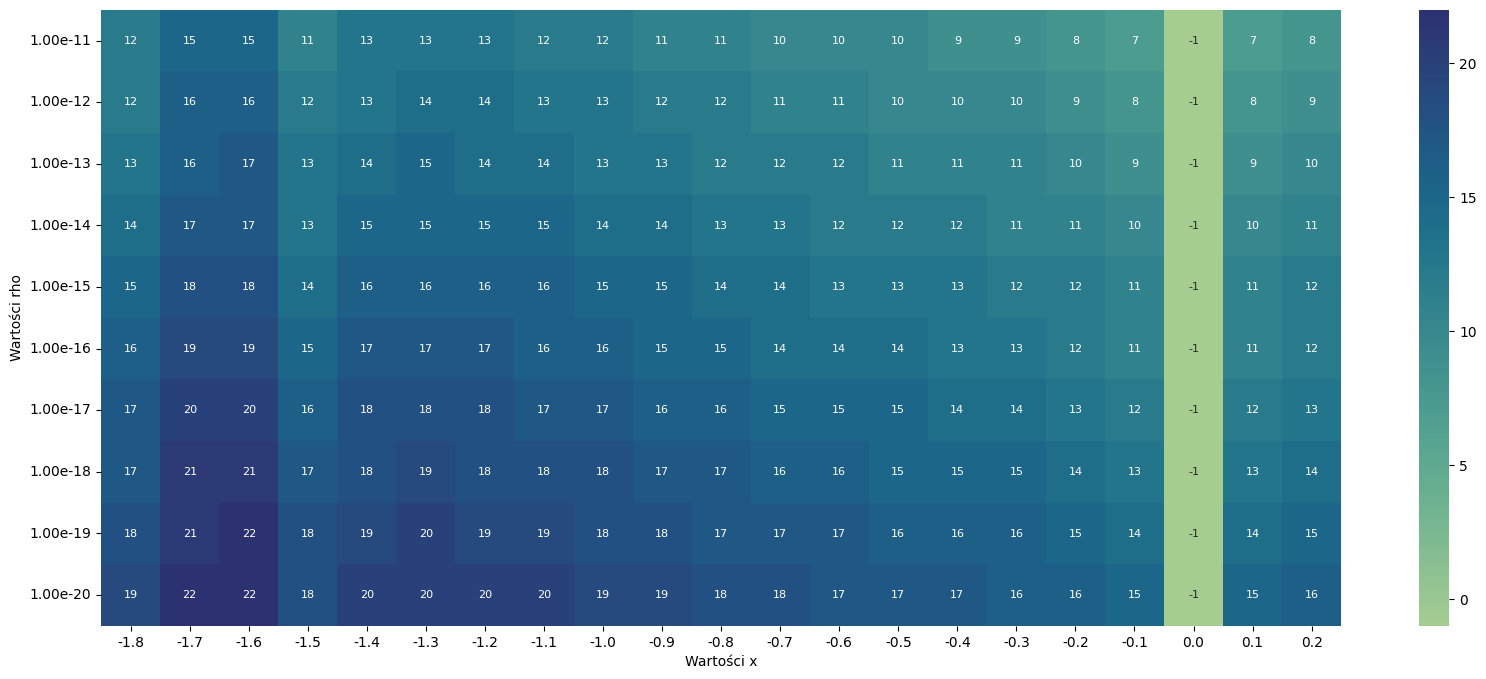

In [118]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_2, ConditionNewton.ABS)

DISTANCE condition

Min value:  -1.1e-10 , Starting x:  -1.8 , Eps:  1e-10 , Contidion:  <function ConditionNewton.<lambda> at 0x000001F4CD789DA0>


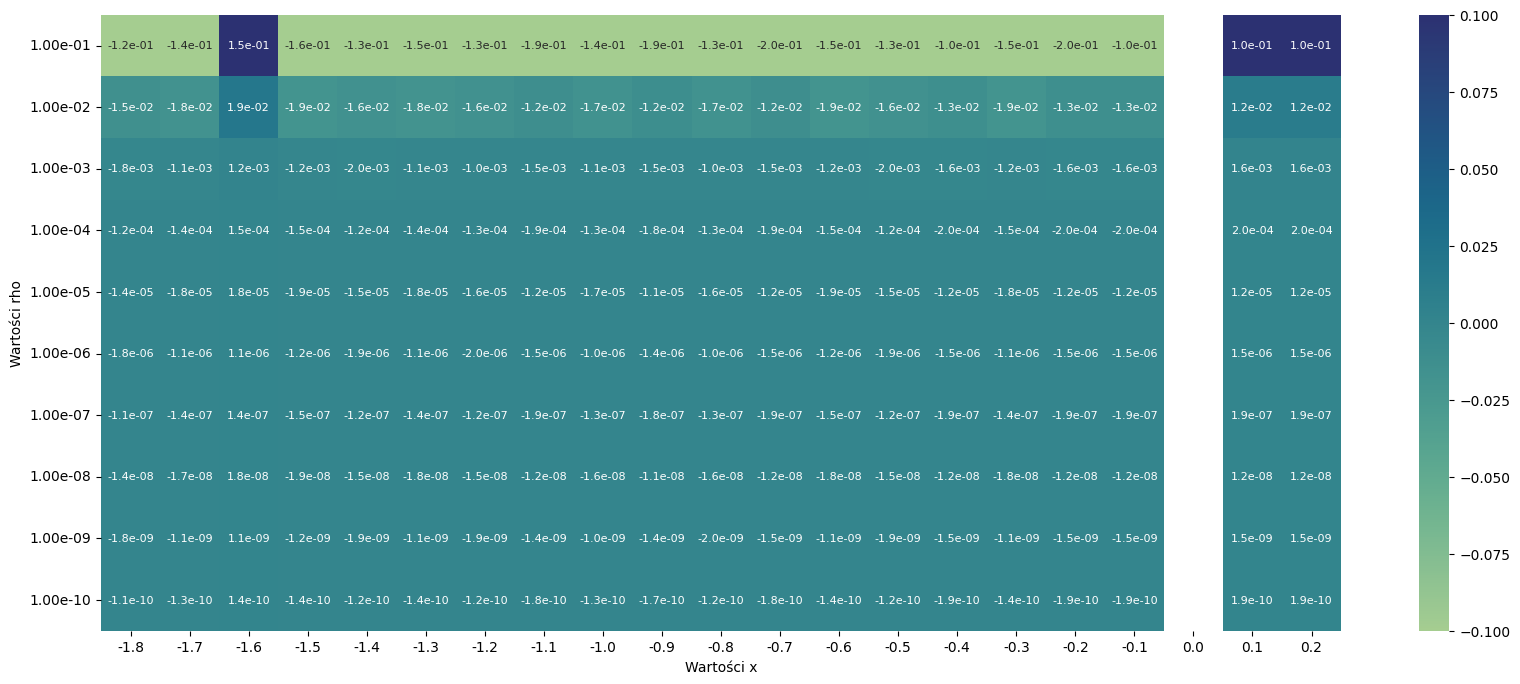

In [119]:
test_newton.plot_heatmap_values(test_newton.eps_values_1, ConditionNewton.DISTANCE)

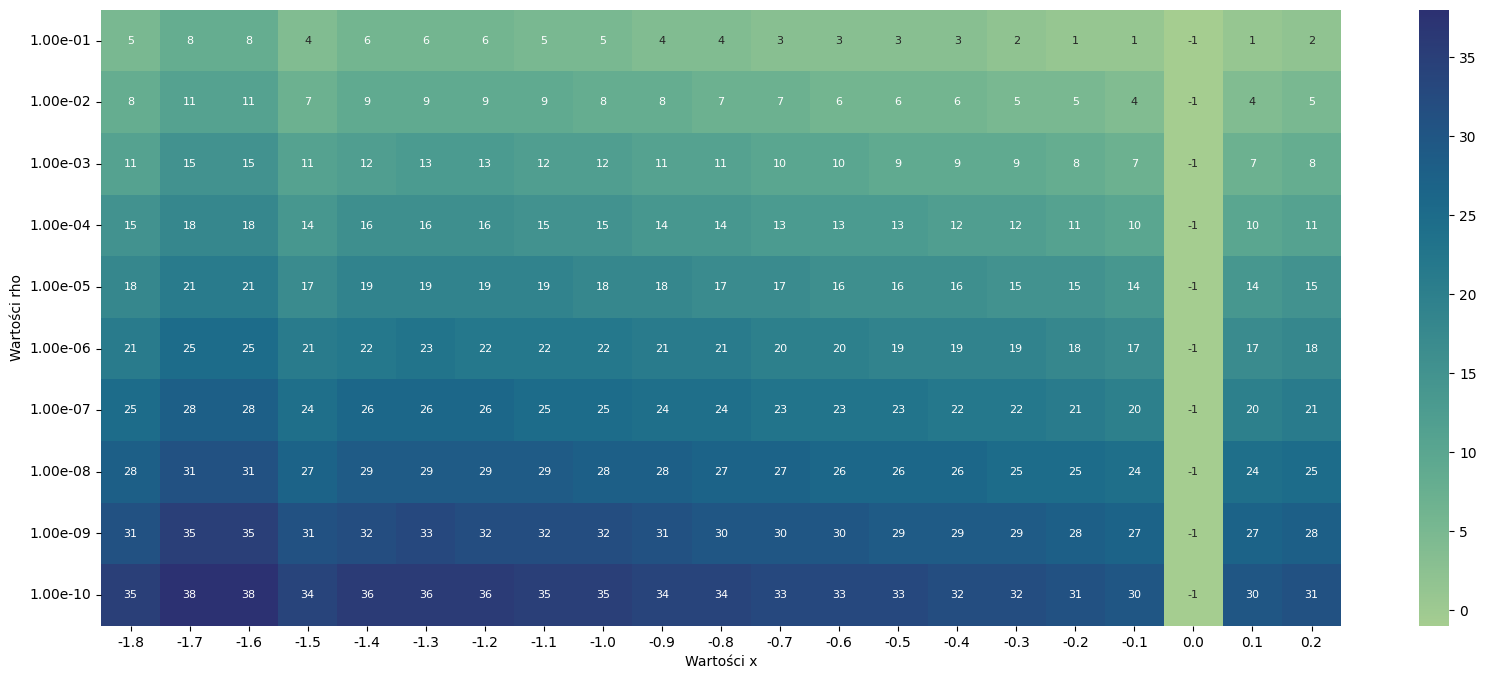

In [120]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_1, ConditionNewton.DISTANCE)

Min value:  -1.0e-20 , Starting x:  -0.9 , Eps:  1e-20 , Contidion:  <function ConditionNewton.<lambda> at 0x000001F4CD789DA0>


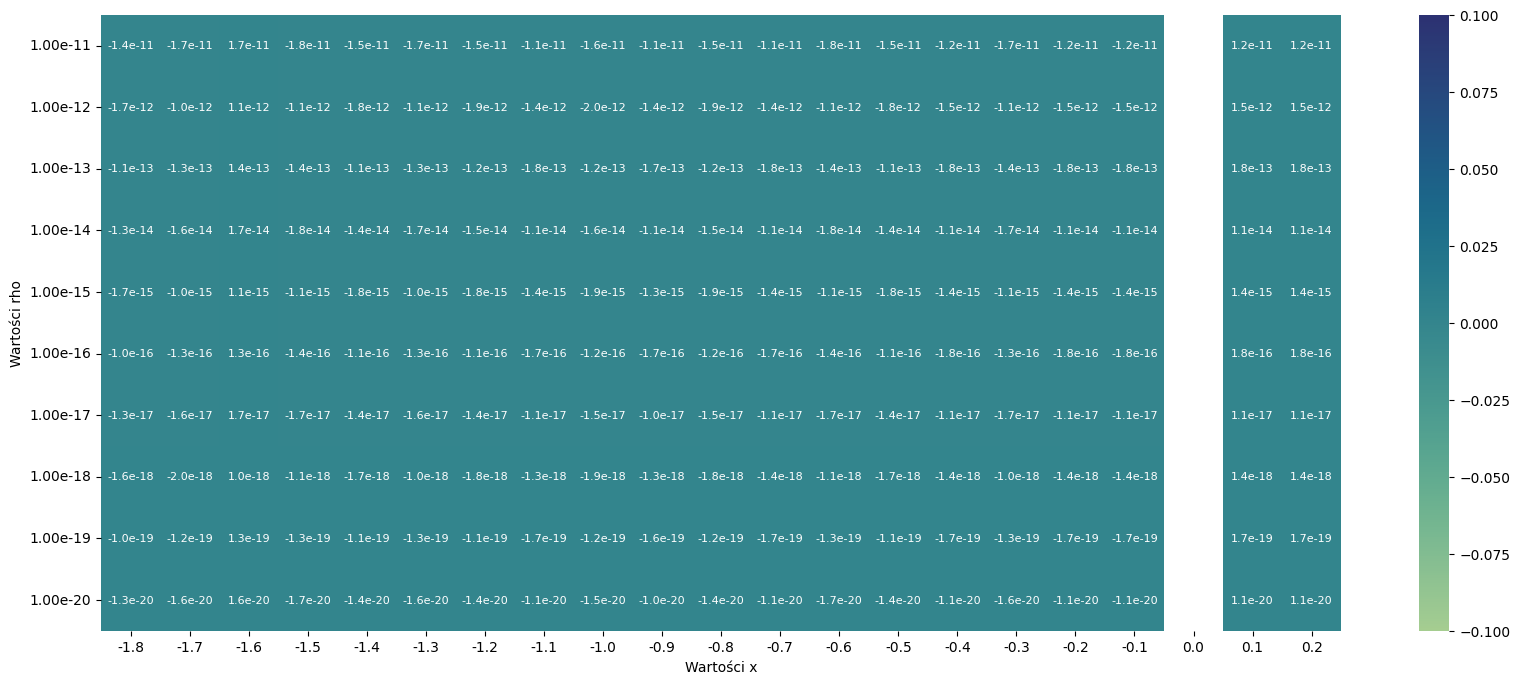

In [121]:
test_newton.plot_heatmap_values(test_newton.eps_values_2, ConditionNewton.DISTANCE)

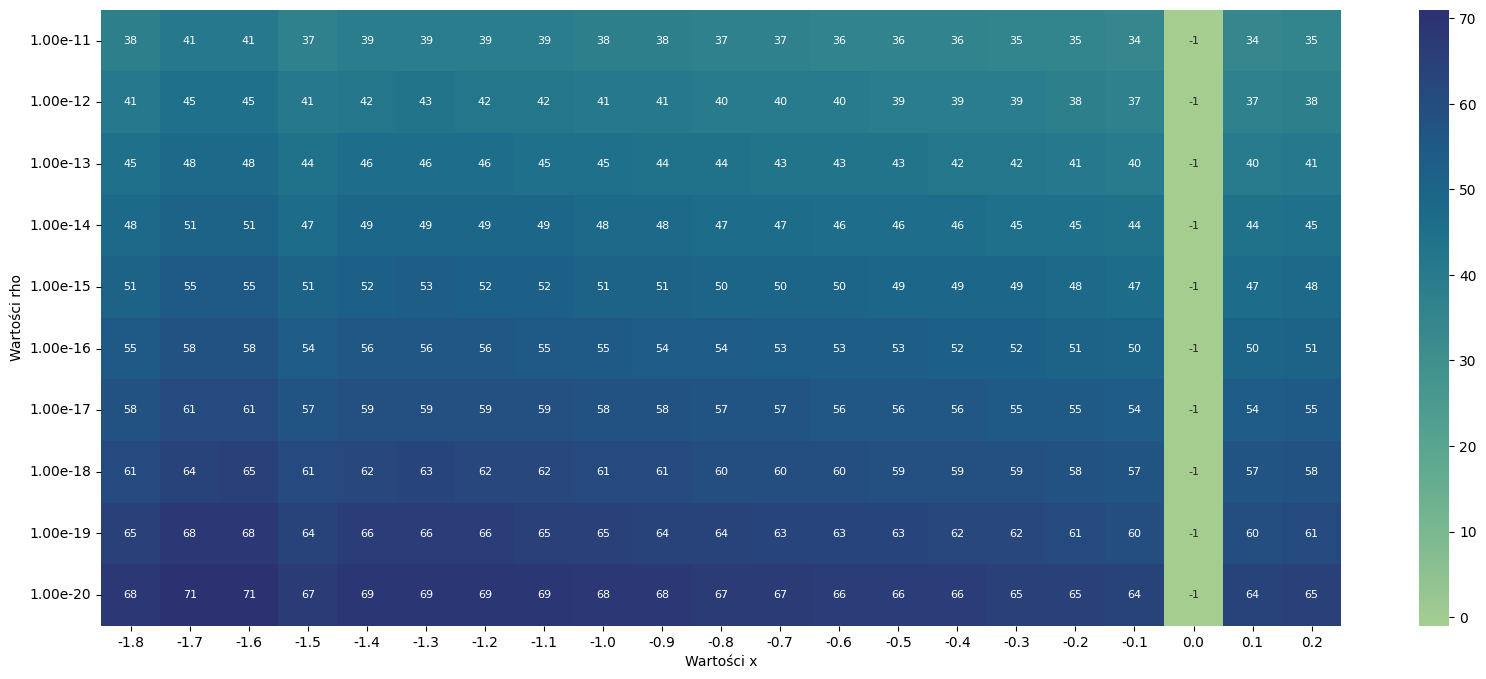

In [122]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_2, ConditionNewton.DISTANCE)

In [129]:
class TestSecantMethod():

    def __init__(self, f, max_iterations = 1000):

        self.f = f
        self.max_iterations = max_iterations

        self.eps_values_1 = [10 ** i for i in range(-1, -10 - 1, -1)]
        self.eps_values_2 = [10 ** i for i in range(-11, -20 - 1, -1)]
        self.x_values = [round(f.left + 0.1 * i, 1) for i in range(0, int(abs(f.left - f.right) / 0.1) + 1)]
                        
    def plot_heatmap_values_fixed_beggining(self, eps_values, condition):
        
        mini = float("inf")
        mini_data = (-1, -1, -1)

        data = np.zeros((len(eps_values), len(self.x_values)))

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                
                x_0, _ = secant_method(self.f, self.f.left, x, condition, eps, self.max_iterations)
                #print('{:.1e}'.format(x_0), x, '{:.2e}'.format(eps))
        
                if abs(x_0) < abs(mini) and x_0 != 0.0:
                    mini = x_0
                    mini_data = (x, eps, condition)

                data[j][i] = x_0

        plt.figure(figsize=(20, 8))

        print("Min value: ", '{:.1e}'.format(mini), ", Starting x: ", mini_data[0], ", Eps: ", eps, ", Contidion: ", condition)
        
        hm = sn.heatmap(data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='.1e', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()

    def plot_heatmap_iterations_fixed_beggining(self, eps_values, condition):
        
        iterations_data = np.zeros((len(eps_values), len(self.x_values)), dtype=int)

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                _, iterations = secant_method(self.f, self.f.left, x, condition, eps, self.max_iterations)
                iterations_data[j][i] = iterations

        plt.figure(figsize=(20, 8))

        hm = sn.heatmap(iterations_data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='d', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()

    def plot_heatmap_values_fixed_end(self, eps_values, condition):
        
        mini = float("inf")
        mini_data = (-1, -1, -1)

        data = np.zeros((len(eps_values), len(self.x_values)))

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                
                x_0, _ = secant_method(self.f, x, self.f.right, condition, eps, self.max_iterations)
                #print('{:.1e}'.format(x_0), x, '{:.2e}'.format(eps))
        
                if abs(x_0) < abs(mini) and x_0 != 0.0:
                    mini = x_0
                    mini_data = (x, eps, condition)

                data[j][i] = x_0

        plt.figure(figsize=(20, 8))

        print("Min value: ", '{:.1e}'.format(mini), ", Starting x: ", mini_data[0], ", Eps: ", eps, ", Contidion: ", condition)
        
        hm = sn.heatmap(data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='.1e', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()
        
    def plot_heatmap_iterations_fixed_end(self, eps_values, condition):
        
        iterations_data = np.zeros((len(eps_values), len(self.x_values)), dtype=int)

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                _, iterations = secant_method(self.f, x, self.f.right, condition, eps, self.max_iterations)
                iterations_data[j][i] = iterations

        plt.figure(figsize=(20, 8))

        hm = sn.heatmap(iterations_data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='d', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()



In [130]:
tsm = TestSecantMethod(f)

Min value:  -6.3e-06 , Starting x:  -0.3 , Eps:  1e-10 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD78B420>


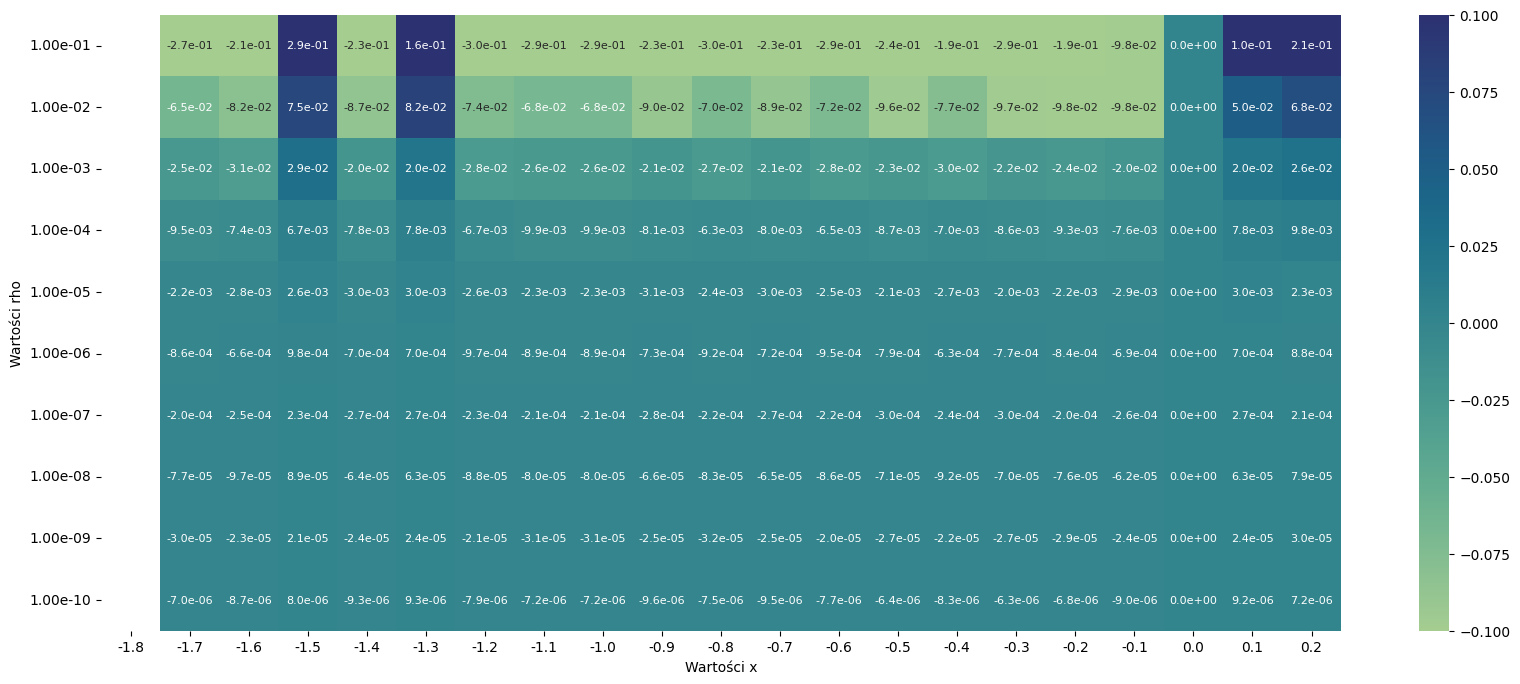

In [131]:
tsm.plot_heatmap_values_fixed_beggining(tsm.eps_values_1, ConditionSecant.ABS)

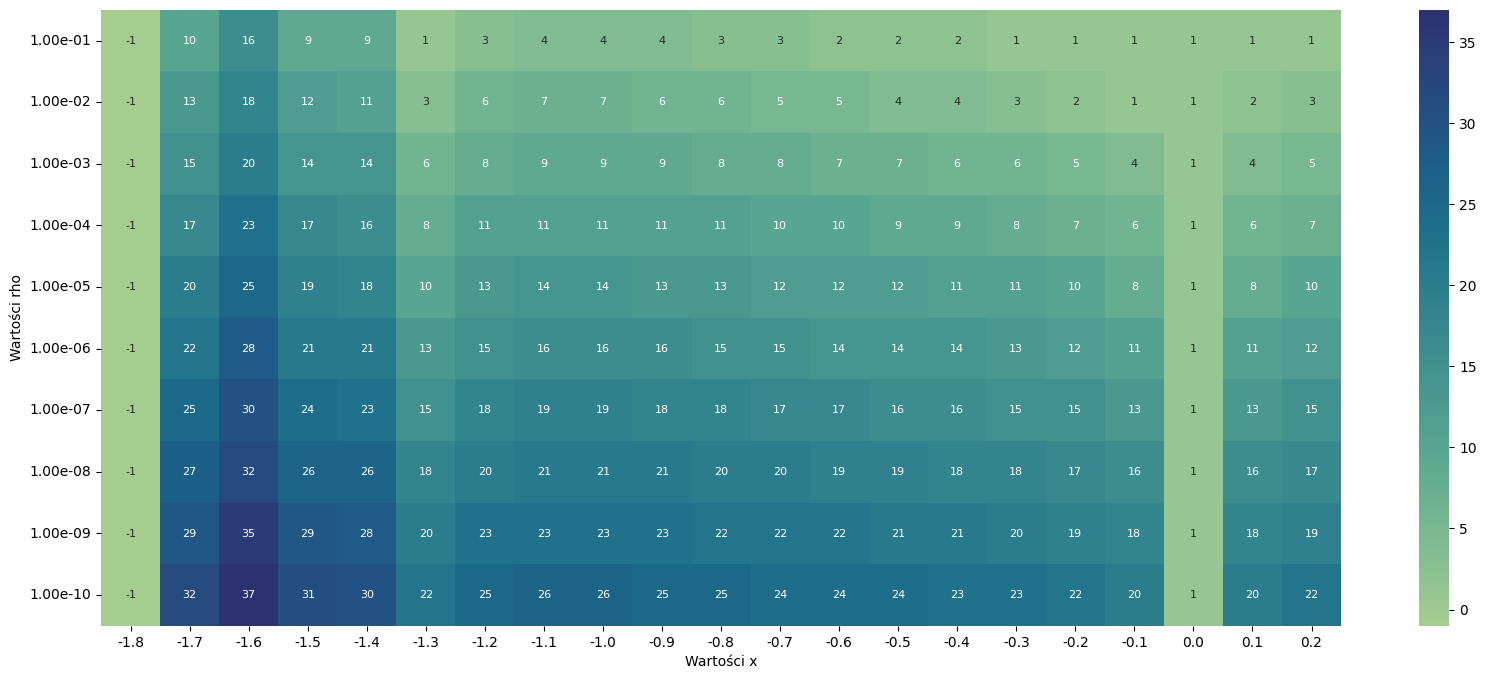

In [132]:
tsm.plot_heatmap_iterations_fixed_beggining(tsm.eps_values_1, ConditionSecant.ABS)

Min value:  -6.6e-11 , Starting x:  -0.2 , Eps:  1e-20 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD78B420>


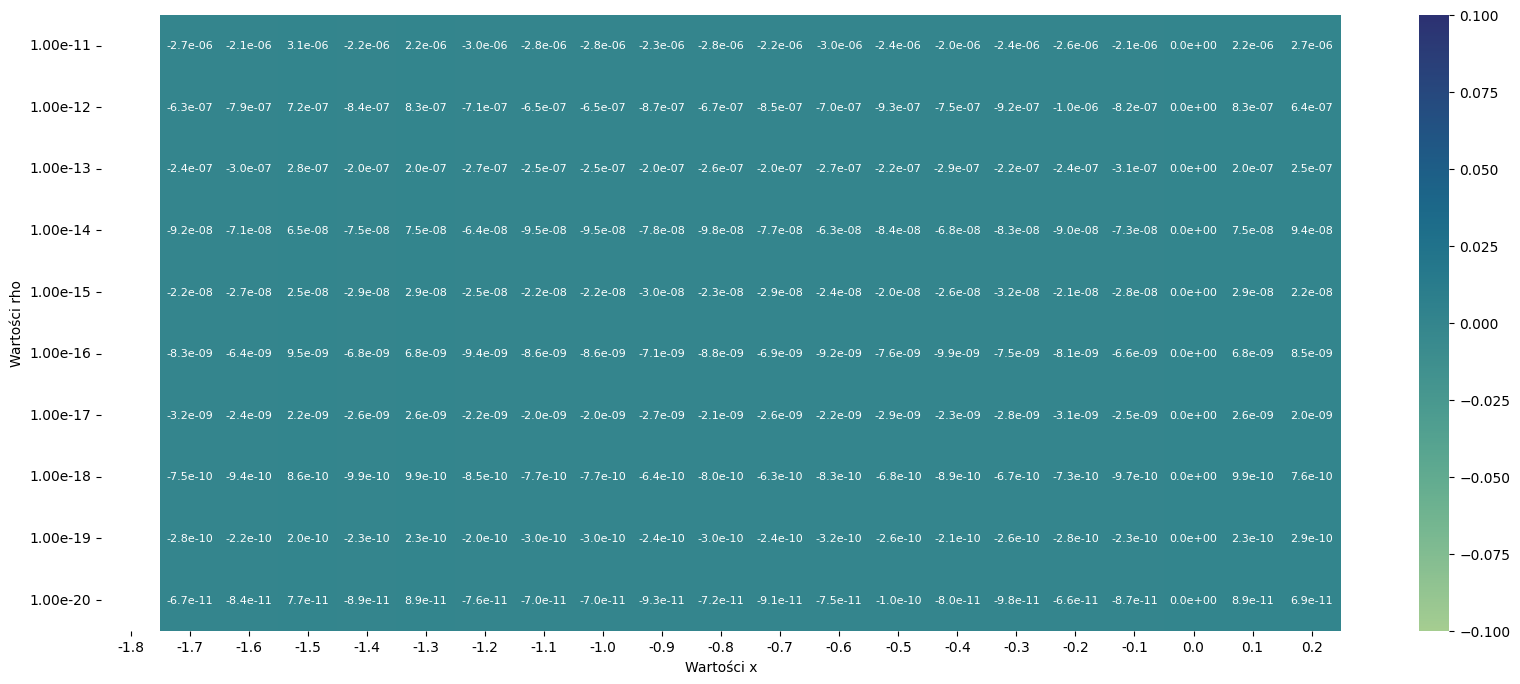

In [135]:
tsm.plot_heatmap_values_fixed_beggining(tsm.eps_values_2, ConditionSecant.ABS)

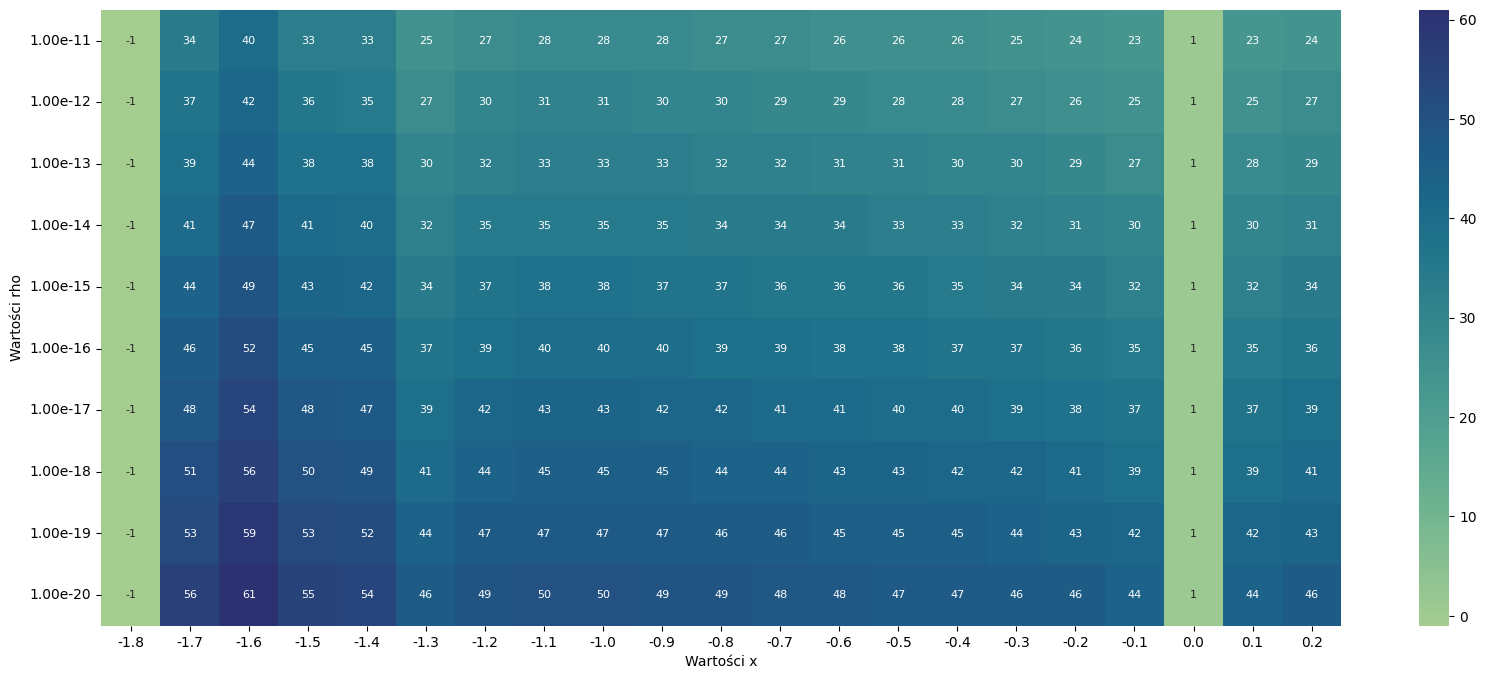

In [136]:
tsm.plot_heatmap_iterations_fixed_beggining(tsm.eps_values_2, ConditionSecant.ABS)

Min value:  6.2e-06 , Starting x:  -0.4 , Eps:  1e-10 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD78B420>


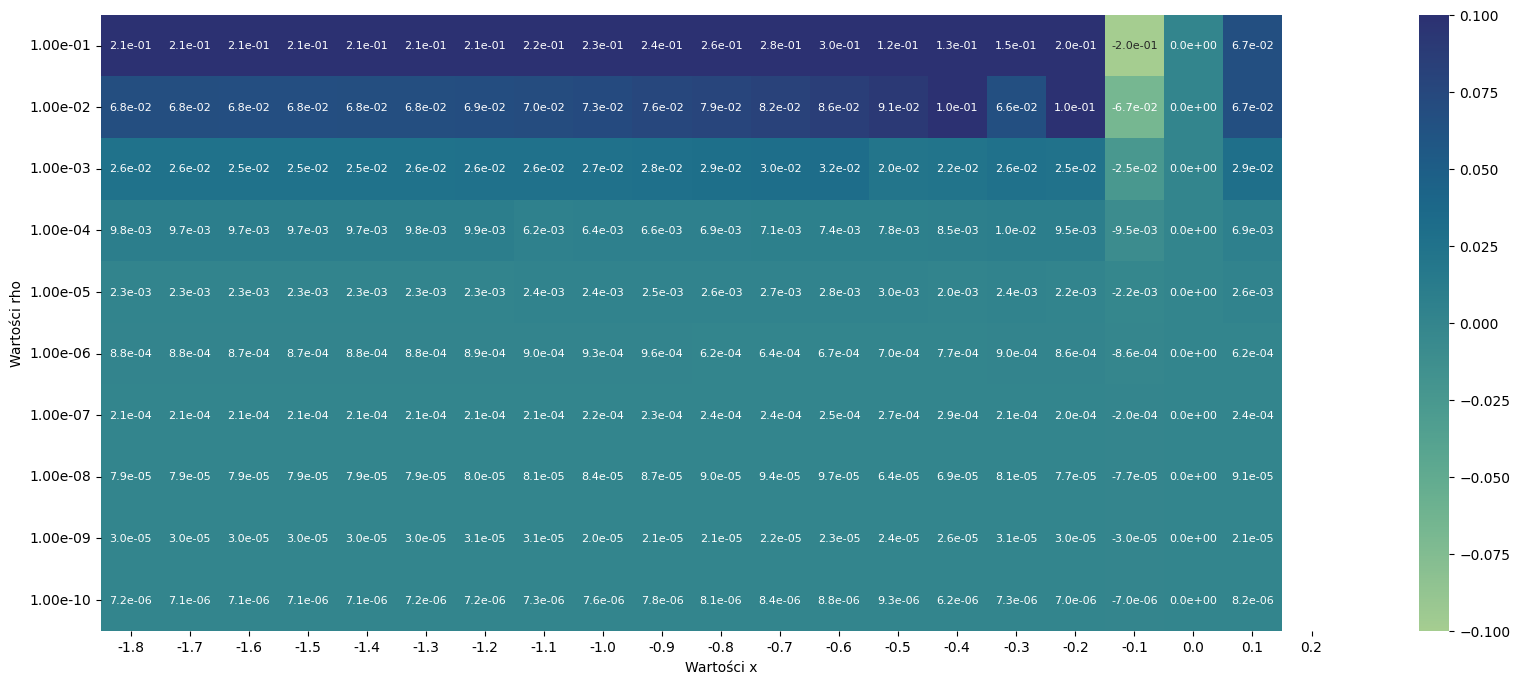

In [137]:
tsm.plot_heatmap_values_fixed_end(tsm.eps_values_1, ConditionSecant.ABS)

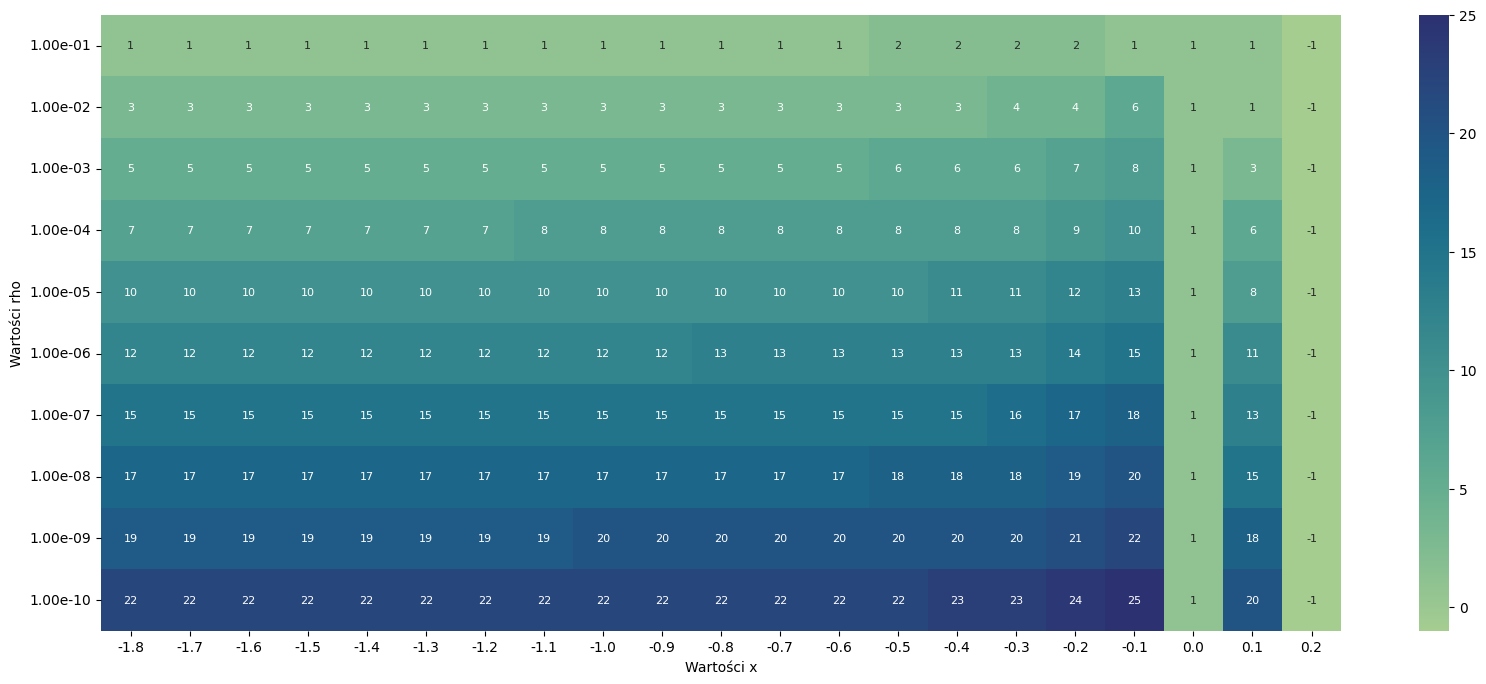

In [138]:
tsm.plot_heatmap_iterations_fixed_end(tsm.eps_values_1, ConditionSecant.ABS)

Min value:  6.7e-11 , Starting x:  -0.2 , Eps:  1e-20 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD78B420>


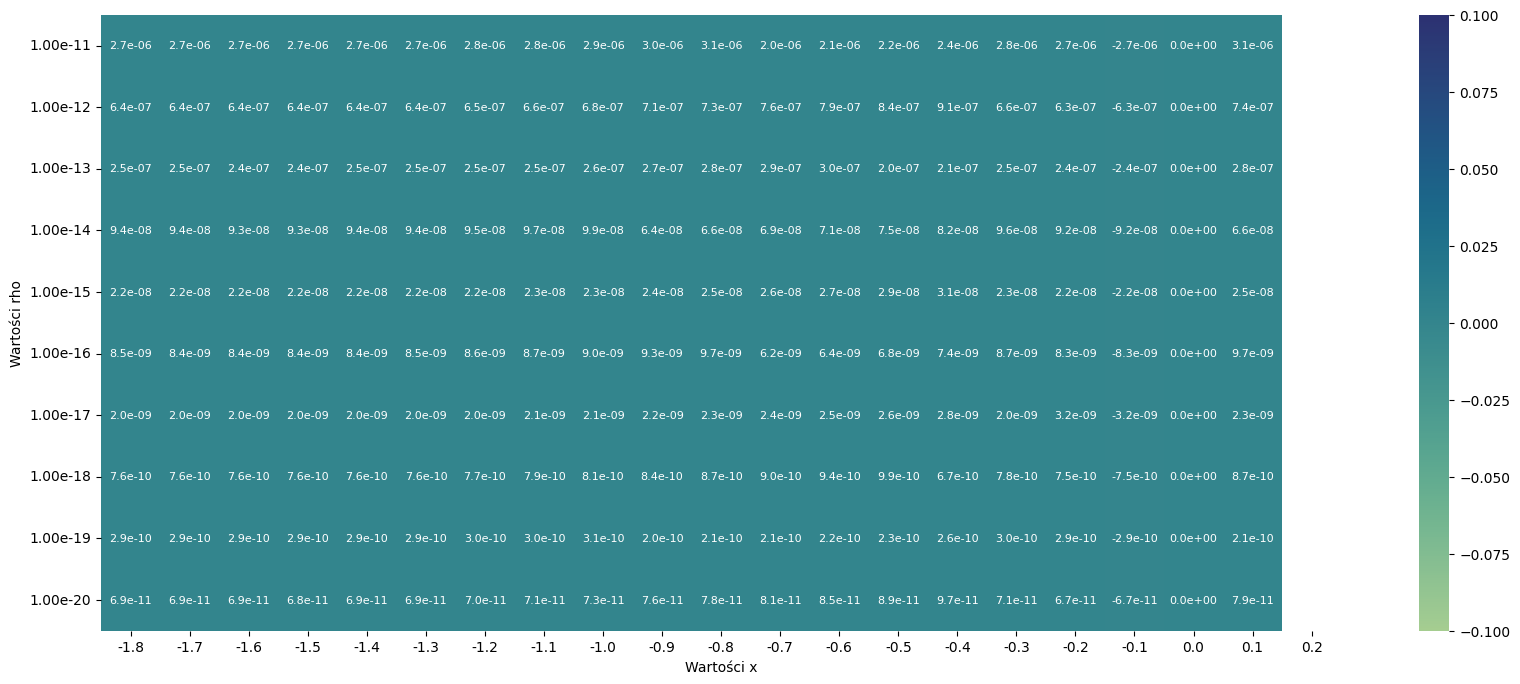

In [141]:
tsm.plot_heatmap_values_fixed_end(tsm.eps_values_2, ConditionSecant.ABS)

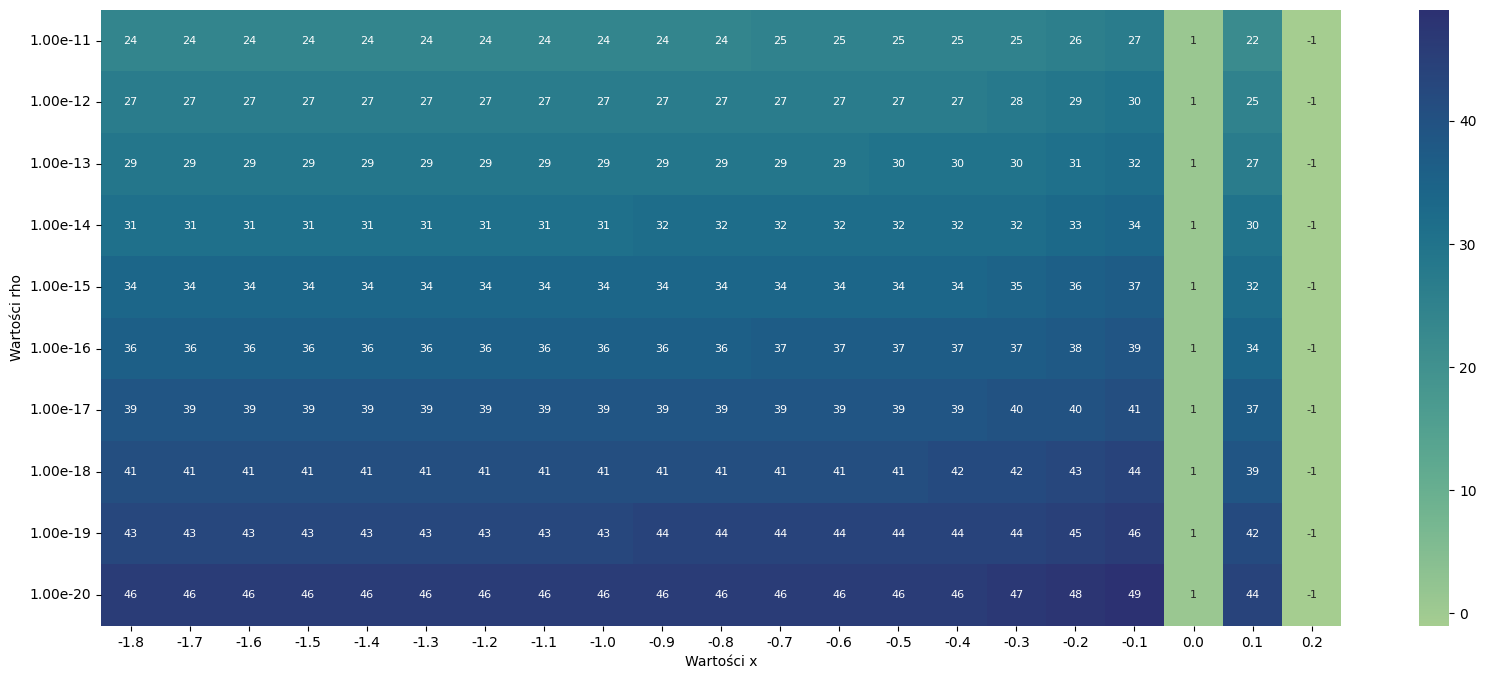

In [142]:
tsm.plot_heatmap_iterations_fixed_end(tsm.eps_values_2, ConditionSecant.ABS)

Min value:  -1.1e-10 , Starting x:  -0.2 , Eps:  1e-10 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD789F80>


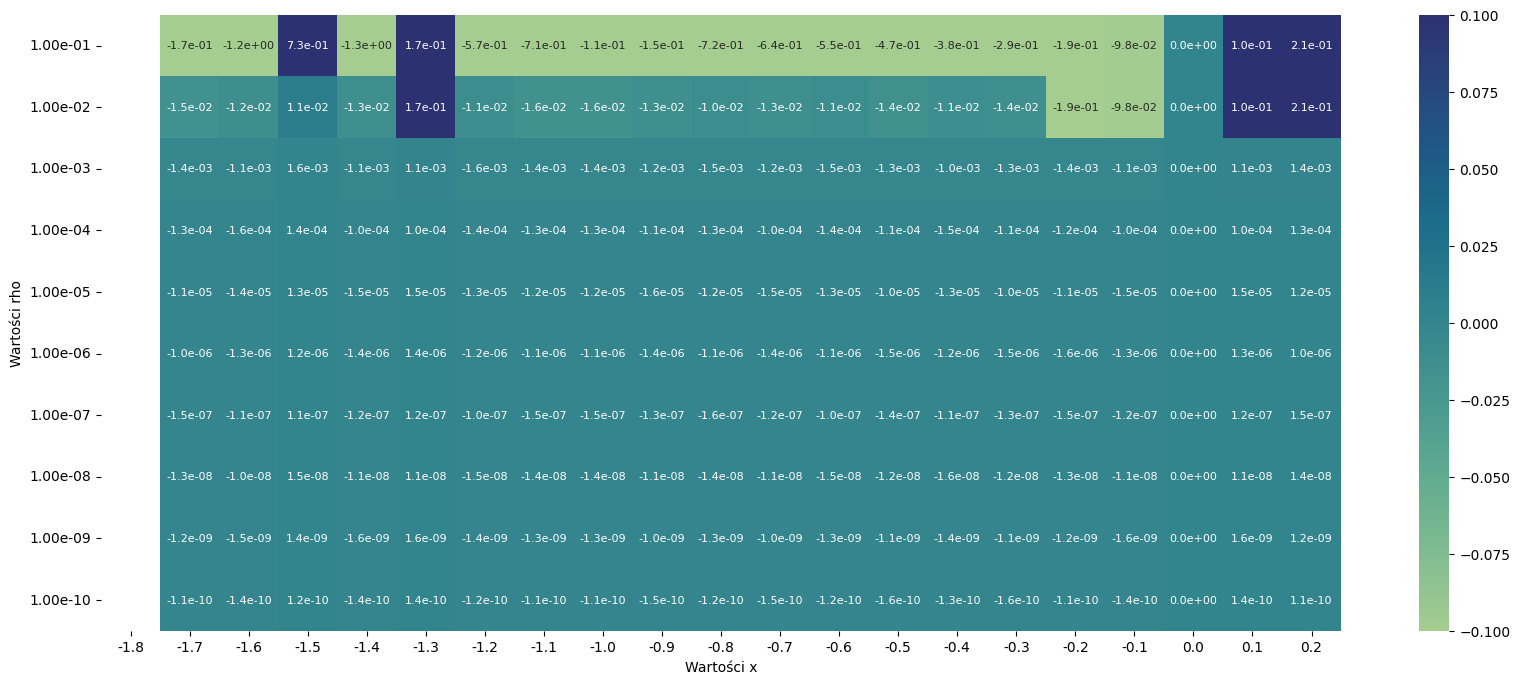

In [143]:
tsm.plot_heatmap_values_fixed_beggining(tsm.eps_values_1, ConditionSecant.DISTANCE)

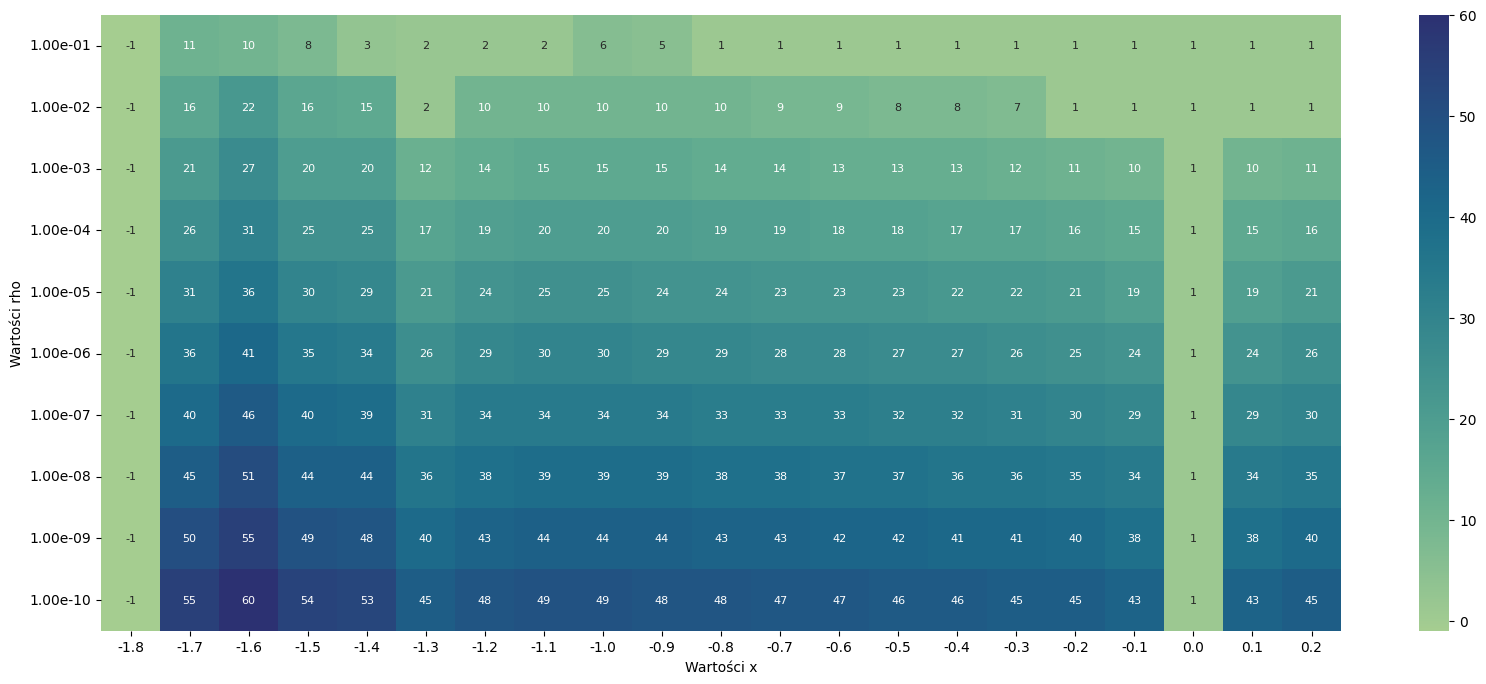

In [144]:
tsm.plot_heatmap_iterations_fixed_beggining(tsm.eps_values_1, ConditionSecant.DISTANCE)

Min value:  -1.0e-20 , Starting x:  -1.7 , Eps:  1e-20 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD789F80>


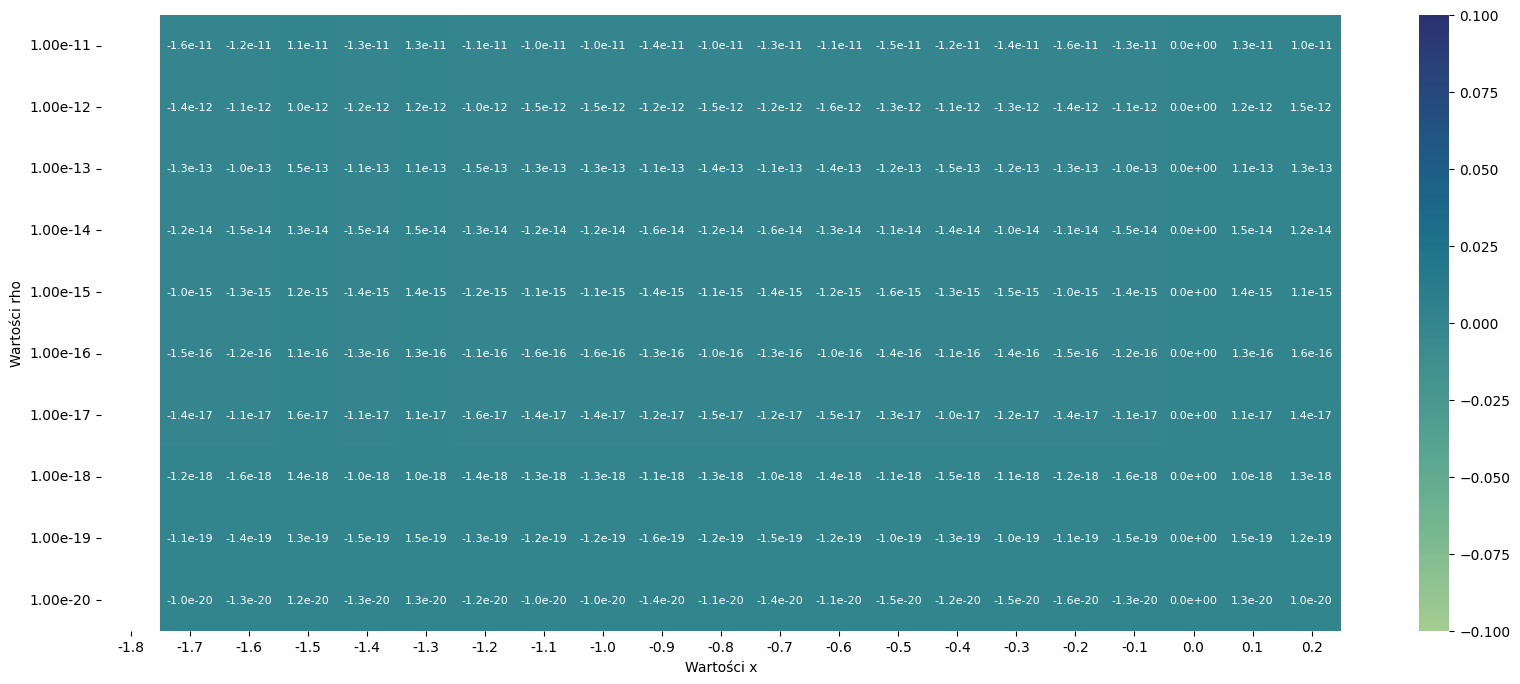

In [145]:
tsm.plot_heatmap_values_fixed_beggining(tsm.eps_values_2, ConditionSecant.DISTANCE)

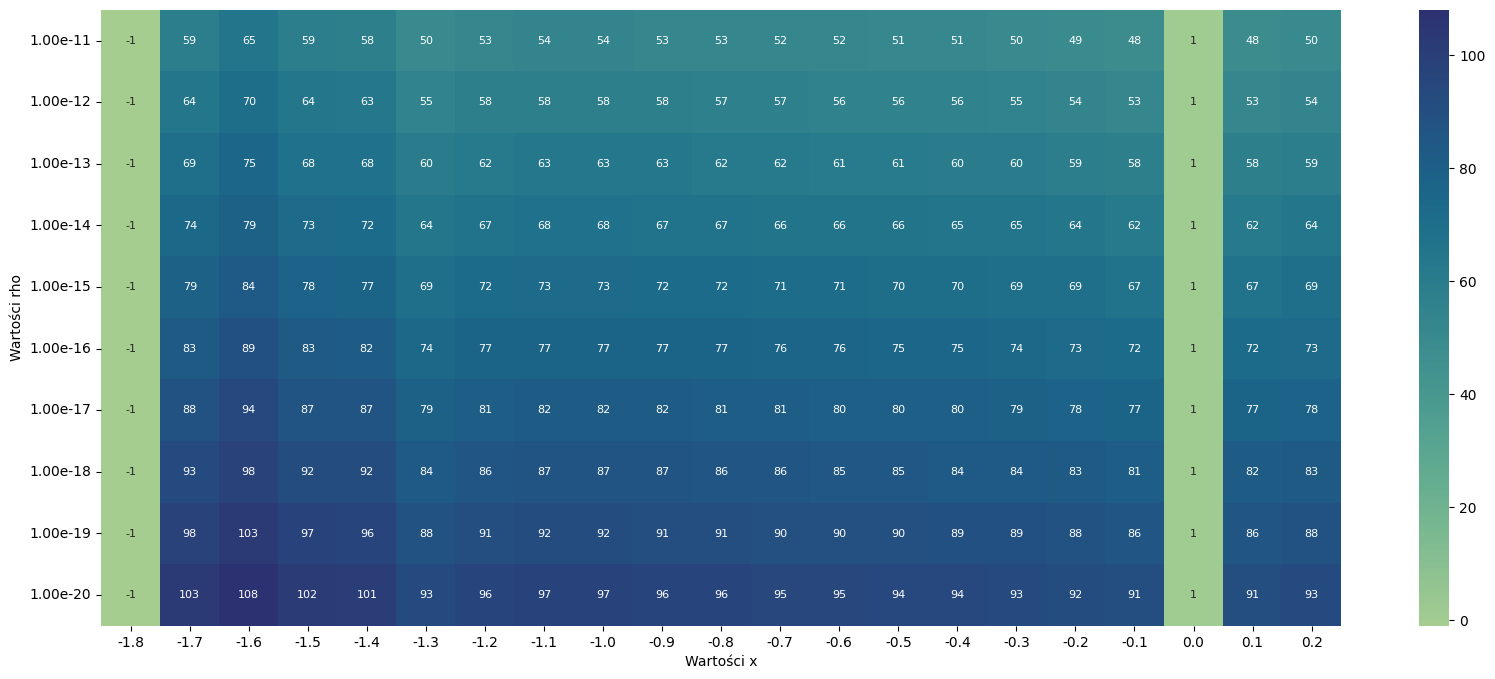

In [146]:
tsm.plot_heatmap_iterations_fixed_beggining(tsm.eps_values_2, ConditionSecant.DISTANCE)

Min value:  1.1e-10 , Starting x:  -0.2 , Eps:  1e-10 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD789F80>


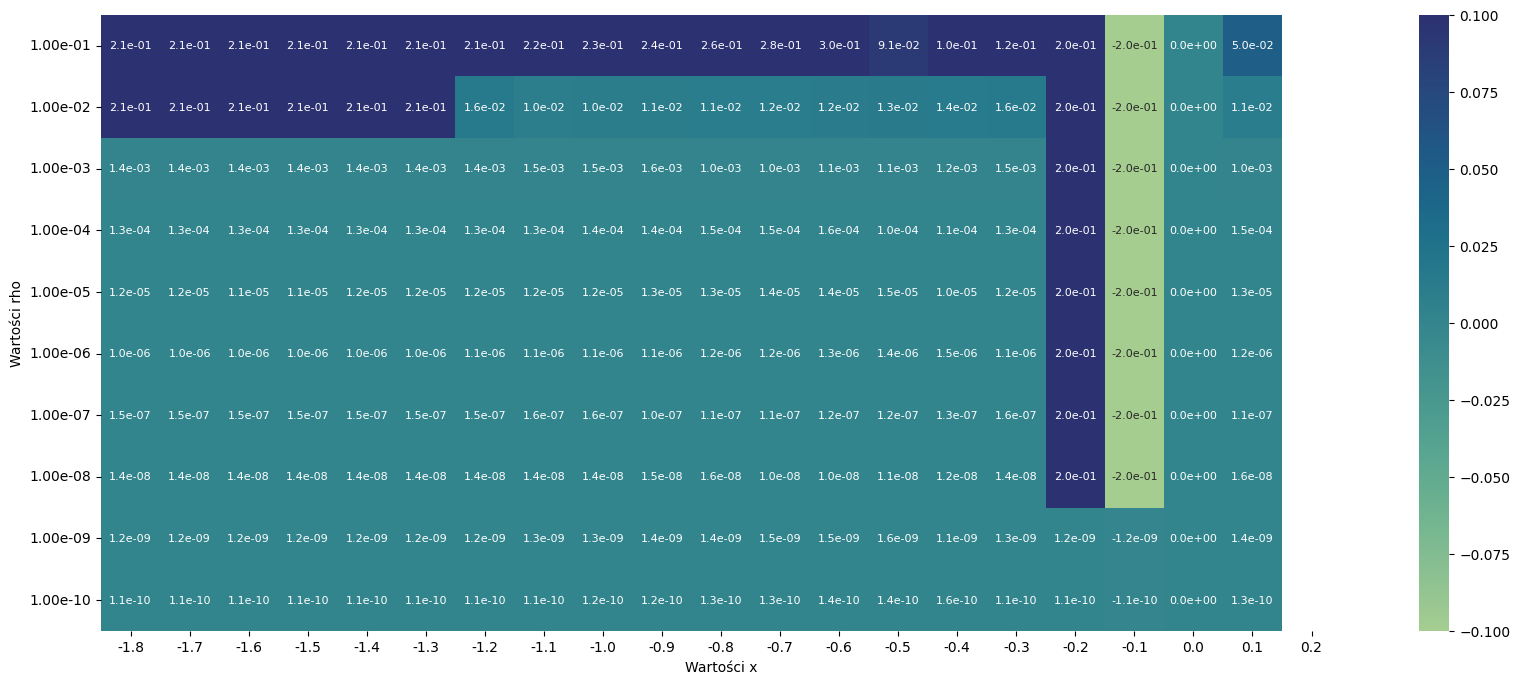

In [149]:
tsm.plot_heatmap_values_fixed_end(tsm.eps_values_1, ConditionSecant.DISTANCE)

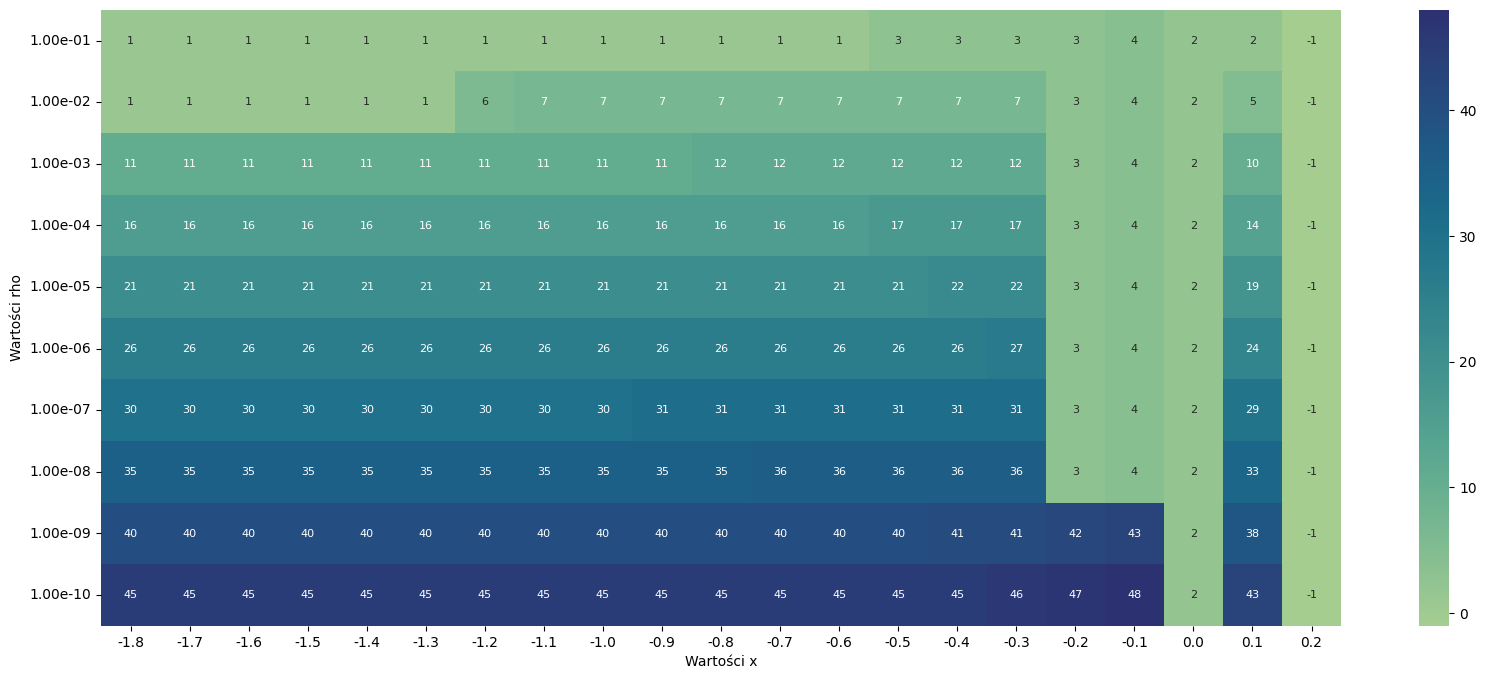

In [148]:
tsm.plot_heatmap_iterations_fixed_end(tsm.eps_values_1, ConditionSecant.DISTANCE)

Min value:  1.0e-20 , Starting x:  -0.2 , Eps:  1e-20 , Contidion:  <function ConditionSecant.<lambda> at 0x000001F4CD789F80>


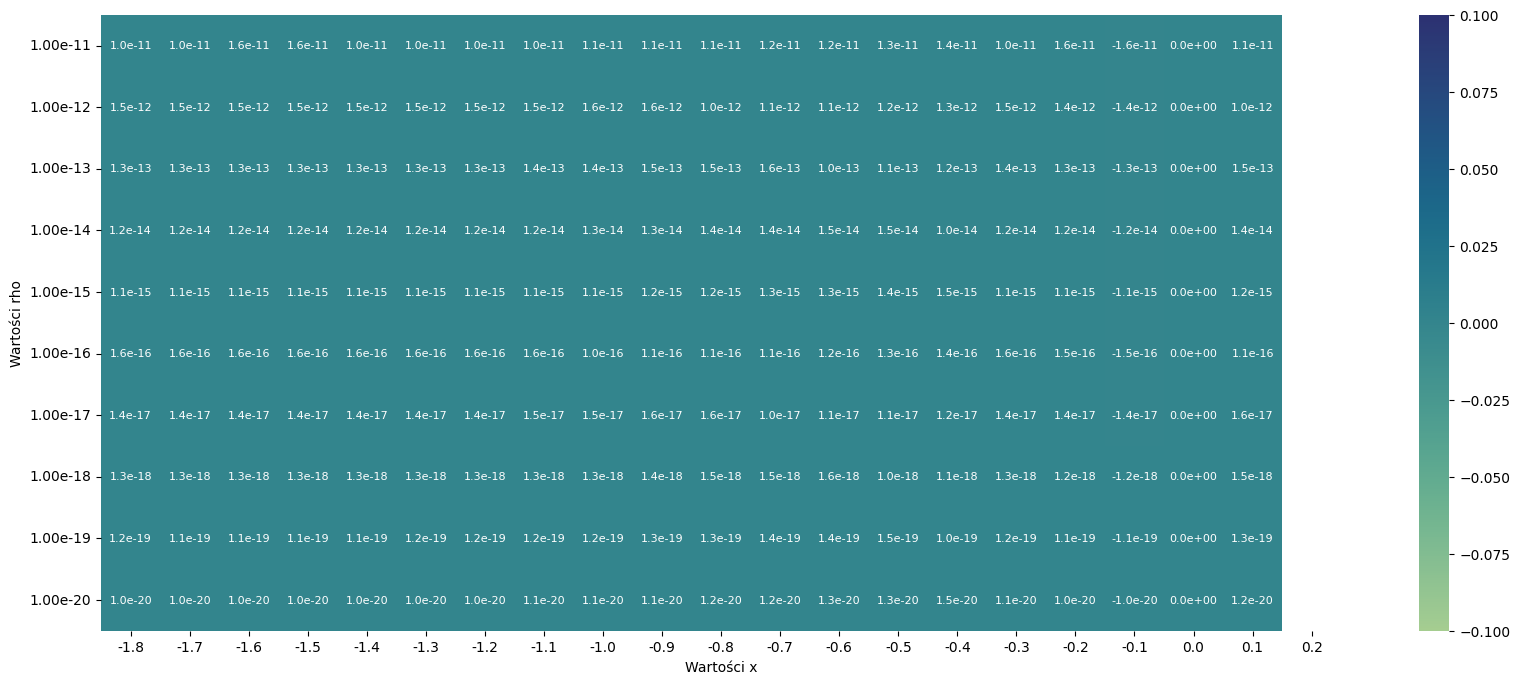

In [150]:
tsm.plot_heatmap_values_fixed_end(tsm.eps_values_2, ConditionSecant.DISTANCE)

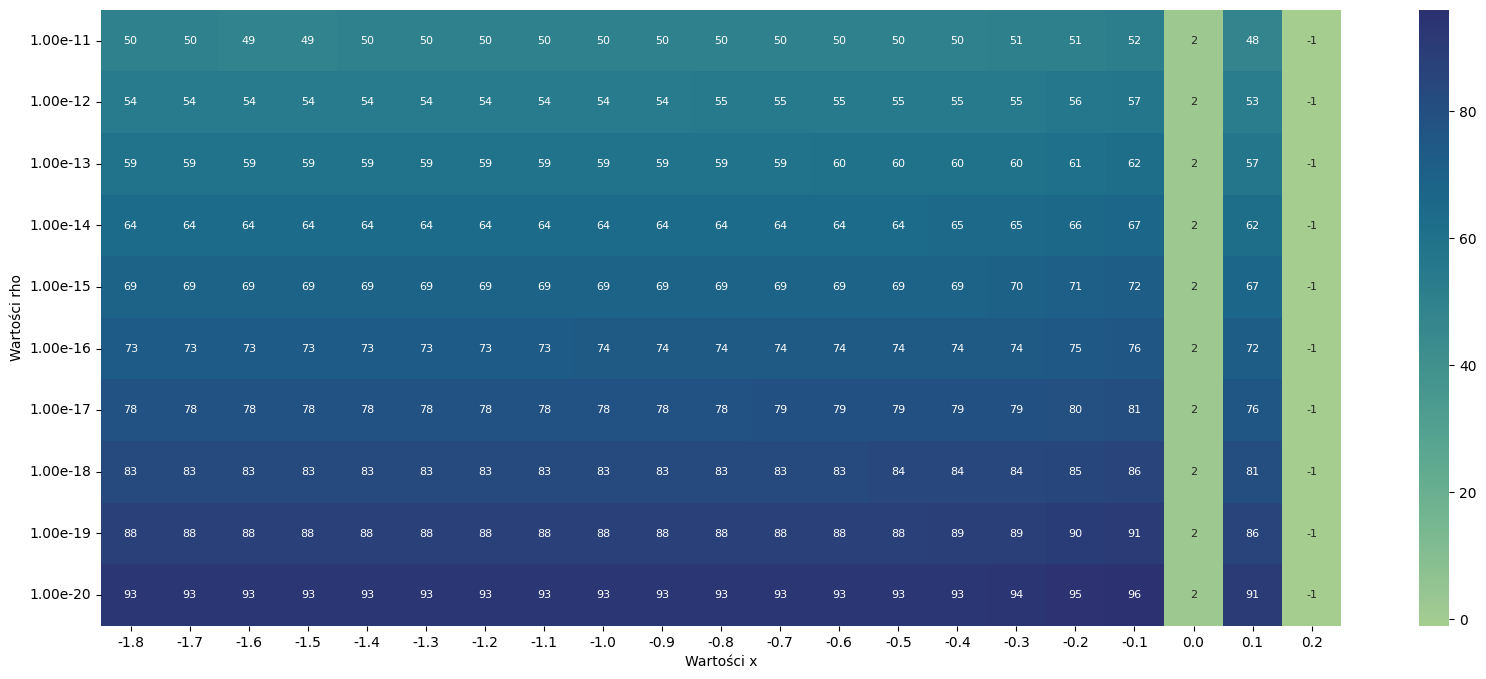

In [151]:
tsm.plot_heatmap_iterations_fixed_end(tsm.eps_values_2, ConditionSecant.DISTANCE)

In [64]:
class CompareMethods(): 

    def __init__(self, f, max_iterations = 1000):

        self.f = f
        self.max_iterations = max_iterations

        self.eps_values = [10 ** i for i in range(-1, -20 - 1, -1)]
        self.x_values = [round(f.left + 0.1 * i, 1) for i in range(0, int(abs(f.left - f.right) / 0.1) + 1)]
        
        
    def compare_abs(self):
        
        x_newton = []
        it_newton = []
        x_secant = []
        it_secant = []
        
        for eps in self.eps_values:
            
            for x in self.x_values:

                result_x_newton, iterations_newton = newton_raphson_method(f, x, ConditionNewton.ABS, eps, 1000)
                result_x_secant, iterations_secant = secant_method(f, f.left, x, ConditionSecant.ABS, eps, 1000)

                x_newton.append(result_x_newton)
                it_newton.append(iterations_newton)
                x_secant.append(result_x_secant)
                it_secant.append(iterations_secant)
                
        plt.scatter(it_secant, x_secant, color = 'red', alpha = 0.3, label = "Metoda siecznych")
        plt.scatter(it_newton, x_newton, color = 'blue', alpha = 0.3, label="Metoda Newtona")
        
        plt.xlabel('Liczba iteracji')
        plt.ylabel('Wartość przybliżenia')
        plt.legend()
        plt.show()        
        
    def compare_distance(self):
        
        x_newton = []
        it_newton = []
        x_secant = []
        it_secant = []
        
        for eps in self.eps_values:
            
            for x in self.x_values:

                result_x_newton, iterations_newton = newton_raphson_method(f, x, ConditionNewton.DISTANCE, eps, 1000)
                result_x_secant, iterations_secant = secant_method(f, f.left, x, ConditionSecant.DISTANCE, eps, 1000)

                x_newton.append(result_x_newton)
                it_newton.append(iterations_newton)
                x_secant.append(result_x_secant)
                it_secant.append(iterations_secant)
                
        plt.scatter(it_secant, x_secant, color = 'red', alpha = 0.3, label = "Metoda siecznych")
        plt.scatter(it_newton, x_newton, color = 'blue', alpha = 0.3, label="Metoda Newtona")
        
        
        plt.xlabel('Liczba iteracji')
        plt.ylabel('Wartość przybliżenia')
        plt.legend()
        plt.show() 

In [65]:
cm = CompareMethods(f)

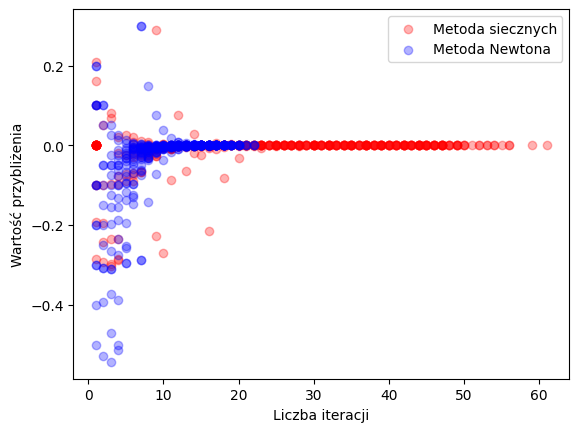

In [66]:
cm.compare_abs()

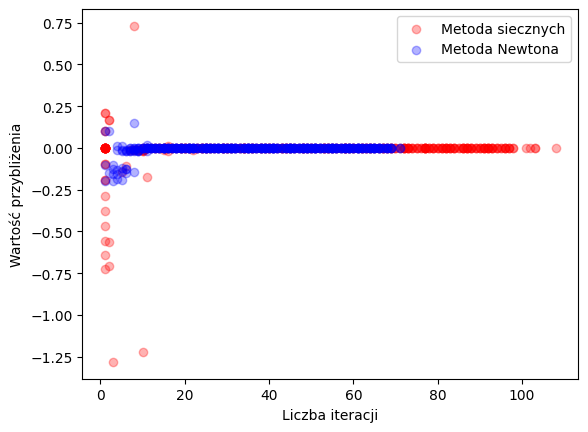

In [67]:
cm.compare_distance()

In [49]:
def newton_raphson_method_step_by_step(f, x_0, condition, eps, max_iterations):
    
    x_steps = []
    
    x_i = x_0
    
    for iteration in range(max_iterations):
        
        x_steps.append(x_i)
        
        y_i = f(x_i)
        yd_i = f.derivative(x_i)
        
        if yd_i == 0: # Derivative equal to zero
            return float("inf"), -1, []
        
        if condition == ConditionNewton.ABS and ConditionNewton.ABS(f(y_i), eps):
            return x_i, iteration + 1, x_steps
        elif condition == ConditionNewton.DISTANCE and ConditionNewton.DISTANCE(y_i, yd_i, eps):
            return x_i, iteration + 1, x_steps
        
        x_i  -= y_i / yd_i        
        
    return float("inf"), -1, [] # Max iterations exceeded

In [123]:
def plot_steps(x_values, img, stop = float('inf')):
    
    y_values = list(map(f, x_values))

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o', color = "red")

    prev_x = None
    # Enumerate the steps
    for i, (x, y) in enumerate(zip(x_values, y_values), 1):
        plt.text(x, y + 1, str(i), fontsize=16, ha='right', color = "blue")
        
        if (prev_x != None and abs(x - prev_x) < 0.1) or i == stop:
            break
        prev_x = x
        
    func_x = np.linspace(f.left, f.right, 10000)
    func_y = list(map(f, func_x))
    plt.plot(func_x, func_y, color = "black")
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.savefig("steps"+img+".png")
    plt.show()

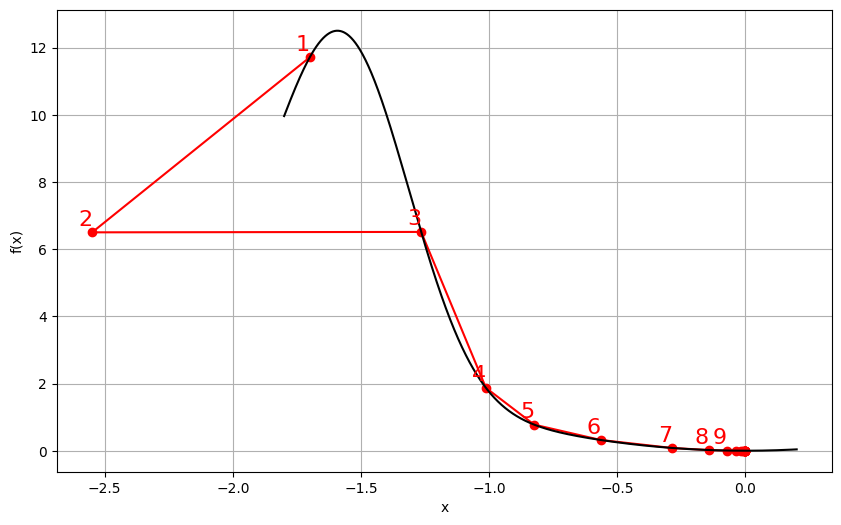

In [106]:
approx, iterations, steps = newton_raphson_method_step_by_step(f, -1.7, ConditionNewton.ABS, 1e-5, 1000)
plot_steps(steps, "01")

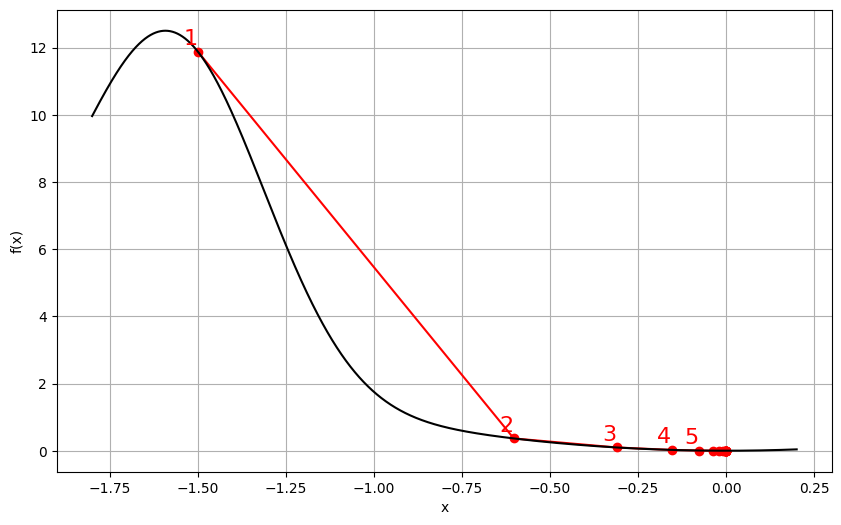

In [107]:
approx, iterations, steps = newton_raphson_method_step_by_step(f, -1.5, ConditionNewton.ABS, 1e-5, 1000)
plot_steps(steps, "02")

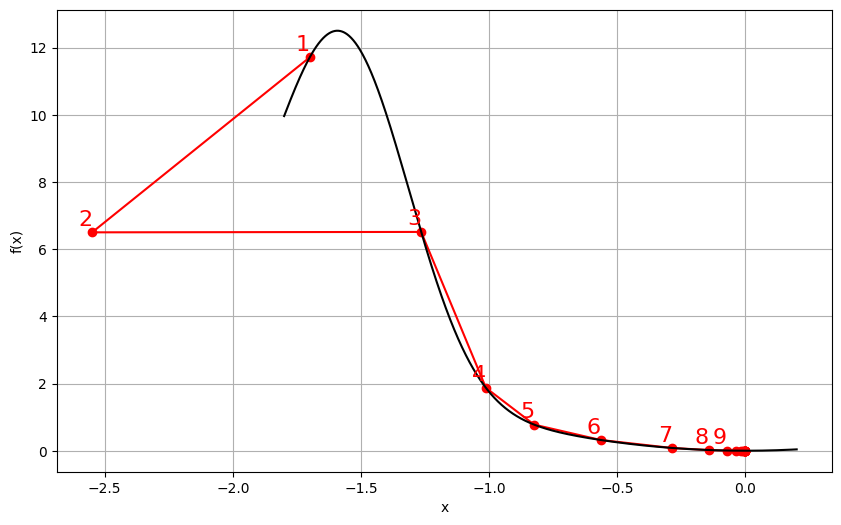

In [108]:
approx, iterations, steps = newton_raphson_method_step_by_step(f, -1.7, ConditionNewton.DISTANCE, 1e-5, 1000)
plot_steps(steps, "03")

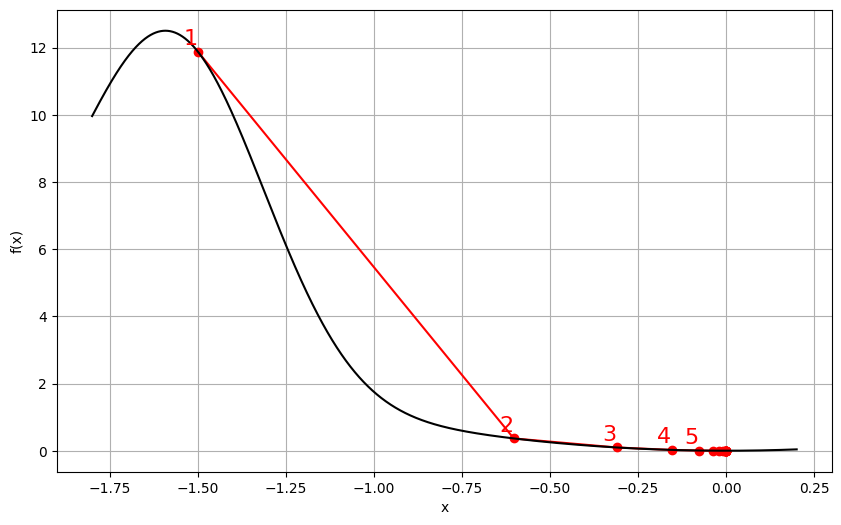

In [109]:
approx, iterations, steps = newton_raphson_method_step_by_step(f, -1.5, ConditionNewton.DISTANCE, 1e-5, 1000)
plot_steps(steps, "04")

In [129]:
def secant_method_step_by_step(f, x_0, x_1, condition, eps, max_iterations):
    
    steps = [x_0]
    
    x_i = x_0
    x_j = x_1 # x_j = x_(i + 1)
    
    for iteration in range(max_iterations):
        
        steps.append(x_j)
        
        if f(x_i) == f(x_j): # Division by zero, thus no solution
            return float("inf"), -1, []
        
        x_i, x_j = x_j, x_j - ( (x_j - x_i) / (f(x_j) - f(x_i)) ) * f(x_j)
        
        if condition == ConditionSecant.ABS and ConditionSecant.ABS(f(x_j), eps):
            return x_j, iteration + 1, steps
        elif condition == ConditionSecant.DISTANCE and ConditionSecant.DISTANCE(x_i, x_j, eps):
            return x_j, iteration + 1, steps
    
    print("Exceeded max number of iterations")
    return float("inf"), -1, [] # Exceeded number of iterations

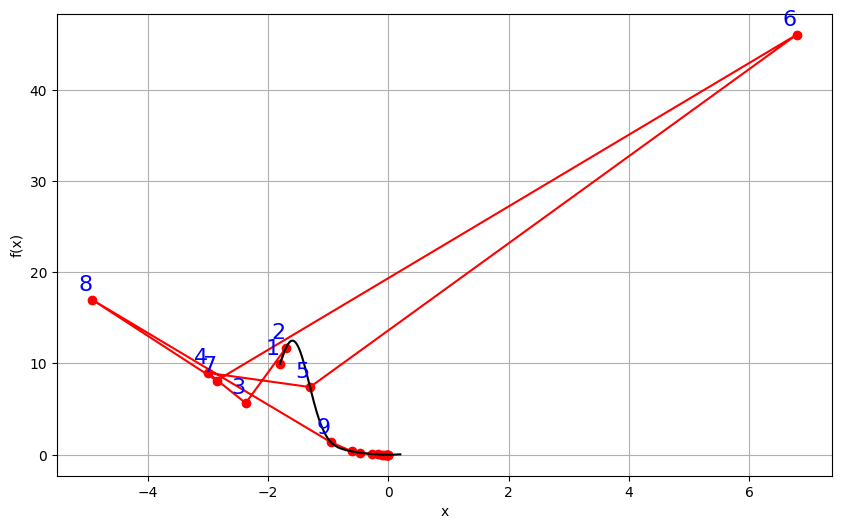

In [138]:
approx, iterations, steps = secant_method_step_by_step(f, -1.8, -1.7, ConditionSecant.ABS, 1e-5, 1000)
plot_steps(steps, "05", 9)

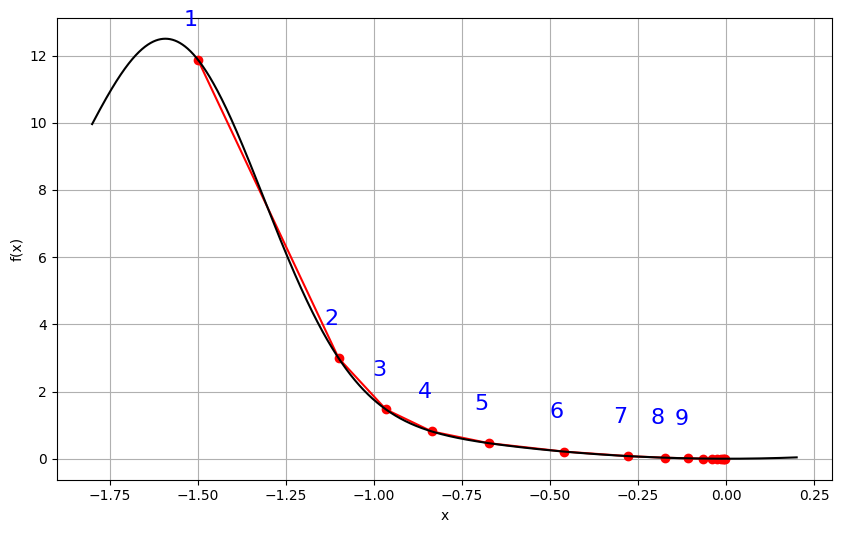

In [139]:
approx, iterations, steps = secant_method_step_by_step(f, -1.5, -1.1, ConditionSecant.ABS, 1e-5, 1000)
plot_steps(steps, "06", 9)

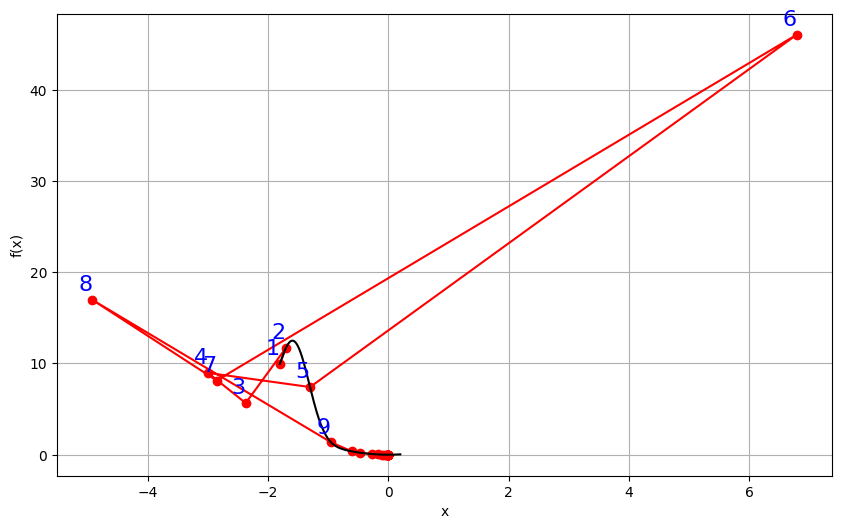

In [140]:
approx, iterations, steps = secant_method_step_by_step(f, -1.8, -1.7, ConditionSecant.DISTANCE, 1e-5, 1000)
plot_steps(steps, "07", 9)

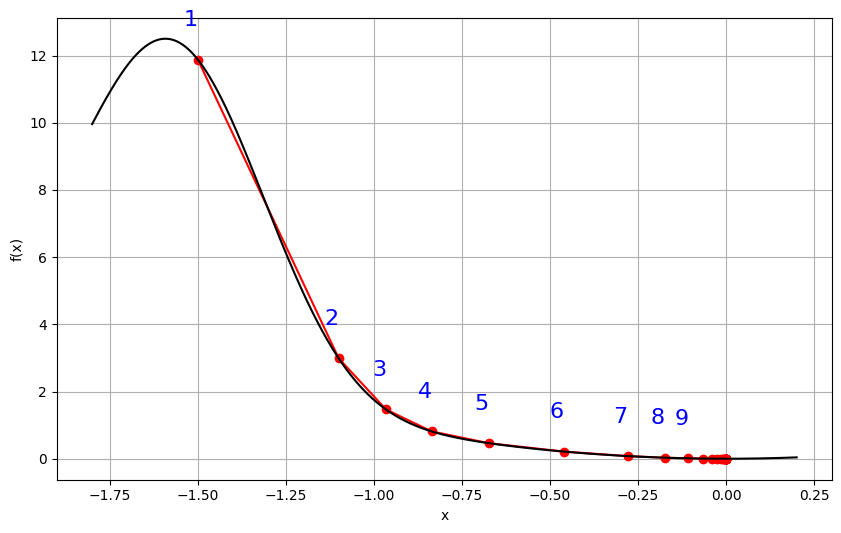

In [141]:
approx, iterations, steps = secant_method_step_by_step(f, -1.5, -1.1, ConditionSecant.DISTANCE, 1e-5, 1000)
plot_steps(steps, "08", 9)